# Exploring the impact of healthcare access and affordability. 

#### Student name: James Walsham
#### Student ID: 16406040


# Introduction

In my previous assignment, I found a significant relationship between access to healthcare and health outcomes. The goal of this analysis is to expand upon my previous work to understand the state of healthcare access within Aotearoa and to answer key questions around how access effects outcomes. Rising government healthcare spending seems to be a response to the increased prevalence of metabolic diseases and other health issues, rather than a proactive approach. The purpose of this analysis is to understand how healthcare access, healthcare resources and private healthcare spending has changed over time. Additionally, While the link between poverty, economic status, and health outcomes is widely recognized, this analysis aims to provide a more detailed understanding of factors involved in this phenomenon.

## context:
For further context around previous investigations, please see my GitHub page: https://github.com/Walshammy/Intro-Data-Cleaning-158.739/blob/main/158739-JamesWalsham-Assignment1%20(1).ipynb

### Source 1: previous assignment

Susnjak, T., Schumacher, C., Ali, A., Brook, A., Geertsema, P., Matthewson, J., Owens, R., & Smith, J. (2019). Shared Prosperity Index. Knowledge Exchange Hub, Massey University. Auckland, New Zealand. [https://doi.org/10.33217/KEH/SharedProsperity/001/05.2019](https://doi.org/10.33217/KEH/SharedProsperity/001/05.2019)

New Zealand Health Survey. Ministry of Health NZ. (2022, November 18). Retrieved April 8, 2023, from [https://www.health.govt.nz/nz-health-statistics/national-collections-and-surveys/surveys/new-zealand-health-survey](https://www.health.govt.nz/nz-health-statistics/national-collections-and-surveys/surveys/new-zealand-health-survey)

Current health expenditure per capita (current US$) - New Zealand.The World Bank. (2023). Retrieved March 20, 2023, from [https://data.worldbank.org/indicator/SH.XPD.CHEX.PC.CD?locations=NZ&most_recent_year_desc=true](https://data.worldbank.org/indicator/SH.XPD.CHEX.PC.CD?locations=NZ&most_recent_year_desc=true)

StatsNZ. (2021). General Social Survey (GSS). General Social Survey (GSS) - Stats NZ DataInfo+. Retrieved April 8, 2023, from [https://datainfoplus.stats.govt.nz/Item/nz.govt.stats/2ed50ad6-8ab8-47df-883d-210a51b50043](https://datainfoplus.stats.govt.nz/Item/nz.govt.stats/2ed50ad6-8ab8-47df-883d-210a51b50043)

StatsNZ. (2019, June 19). Wellbeing statistics: 2018: Stats NZ. Wellbeing statistics: 2018 | Stats NZ. Retrieved April 8, 2023, from [https://www.stats.govt.nz/information-releases/wellbeing-statistics-2018](https://www.stats.govt.nz/information-releases/wellbeing-statistics-2018)

#### Datasets: GSS

a. nz-health-survey-2021-22-annual-data

b. Current health expenditure per capita (current US$) - New Zealand

c. New Zealand General Social Survey 2008-2016

d. Wellbeing statistics: 2018

e. New Zealand Shared Prosperity Index: Annual Tracking Of National Prosperity Across Multiple Dimensions

### Source 2: World Bank API
1.https://data.worldbank.org/indicator/SH.MED.NUMW.P3

2.https://data.worldbank.org/indicator/SH.MED.PHYS.ZS

3.https://data.worldbank.org/indicator/SH.XPD.PVTD.PC.CD

4.https://data.worldbank.org/indicator/SH.XPD.OOPC.CH.ZS?locations=NZ

5.https://data.worldbank.org/indicator/SH.MED.BEDS.ZS?locations=NZ

#### Datasets: WBmerged
1. Nurses and midwives (per 1,000 people)
2. Physicians (per 1,000 people)
3. Domestic private health expenditure per capita (current US$). The amount of money spent by private entities (such as households, corporations or non-profit organisations).
4. Out-of-pocket expenditure (% of current health expenditure). The percentage of money spent directly by individuals at the time they recieve health care services.
5. Hospital beds (per 1,000 people) - New Zealand

### Source 3: Stats NZ
#### Dataset: STATSNZ
1. The consumers price index (CPI) is a measure of inflation for New Zealand households. It records changes in the price of goods and services. It influences interest rates and is used to calculate changes to benefit payments.
2. Productivity is a measure of how efficiently inputs such as capital and labor are used within the economy to produce outputs of goods and services

### Research Questions

1. How has the availability and affordability of healthcare services in New Zealand evolved over the years?
2. Are there any specific healthcare resources that are particularly sensitive to changes in government health spending?
3. What is the relationship between New Zealand’s economic conditions and the health outcomes of its population?
4. Which variables have the largest impact on personal healthcare spending?

### Executive Summary

The goal of this analysis is to evaluate the relationship between healthcare resources, affordability and access to medical services. Secondarily, this analysis aims to investigate what drives personal healthcare spending within New Zealand. Data were collected from multiple different sources as listed above, they can be summarized as followed; The New Zealand General Social Survey, The World Bank API and Statistics New Zealand. The data were then cleaning, merged and categorized into multiple different cateogories; Healthcare Access, Healthcare Affordability, Healthcare Resources and Economic Factors. These cateogories were then used to perform correlation and regression analyses to answer the research questions. The key findings indicate that the relationships between healthcare resources, affordability and access to medical services is complex with multiple moving parts. The structure for this analysis has been taken from the previous assignment, where it was found that unmet general practitioner care was a strong predictor of Diabetes and Obesity rates.

In [1294]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import requests
from scipy import stats
import sqlite3
import seaborn as sns
import statsmodels.api as sm
from sklearn.impute import KNNImputer
import warnings
from sklearn.decomposition import PCA
from datetime import datetime
warnings.filterwarnings('ignore')
# Set some Pandas options as you like
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 40)
pd.set_option('display.max_rows', 20)
pd.set_option('display.width', 100)
#this line enables the plots to be embedded into the notebook
%matplotlib inline

In [1295]:
pip install selenium

Note: you may need to restart the kernel to use updated packages.


# Data Wrangling 

Data Wrangling for the previous assignment datasets can be found here, as detailed https://github.com/Walshammy/Intro-Data-Cleaning-158.739/blob/main/158739-JamesWalsham-Assignment1%20(1).ipynb

In [1296]:
GSS = pd.read_excel('C:/Users/james/Downloads/unidataset.xlsx')
GSS

,year,adult_diabetes_rates,healthy_weight_adult,excellent_very_good_or_good_self_rated_health,depression_adult,veg_and_fruit_intake_adult,top_10_perc_wealth_share,top_5_perc_wealth_share,top_1_perc_wealth_share,health_expenditure_as_percent_of_gdp,health_expenditure_per_capita_PPP,psychological_distress_adult,GINI-BHC,unemployment_rate,P80:P20_bhc,unmet_GP_care_due_to_cost_adult,unhealthy_weight_adult,employment_rate,bottom_90_perc_wealth_share
0,1982-12-31,3.7,57.8,89.6,10.4,43.0,55,41,20,7.5,1606.30,6.6,27.2,4.2,2.32,5.61,42.2,95.8,45
1,1983-12-31,3.7,57.8,89.6,10.4,43.0,55,41,20,7.5,1606.30,6.6,27.5,4.2,2.29,5.61,42.2,95.8,45
2,1984-12-31,3.7,57.8,89.6,10.4,43.0,55,41,20,7.5,1606.30,6.6,27.5,4.2,2.29,5.61,42.2,95.8,45
3,1985-12-31,3.7,57.8,89.6,10.4,43.0,55,41,20,7.5,1606.30,6.6,27.0,4.2,2.19,5.61,42.2,95.8,45
4,1986-12-31,3.7,57.8,89.6,10.4,43.0,55,41,20,7.5,1606.30,6.6,27.0,4.2,2.19,5.61,42.2,95.8,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32,2014-12-31,5.4,33.4,91.4,15.5,41.5,59,45,22,9.4,3453.30,6.2,34.2,5.4,2.78,14.00,66.6,94.6,41
33,2015-12-31,6.1,33.1,88.9,14.6,40.5,59,45,22,9.3,3530.10,6.2,35.0,5.4,2.61,13.70,66.9,94.6,41
34,2016-12-31,5.8,32.0,87.8,15.4,40.1,59,45,22,9.3,3746.48,6.8,33.8,5.1,2.59,14.30,68.0,94.9,41
35,2017-12-31,5.6,31.9,88.2,16.7,38.8,59,45,22,9.3,3940.39,7.6,33.8,4.7,2.59,14.30,68.1,95.3,41


###  World Bank API
The below code pulls data direclty from the world bank API by first specifying the indicator, response and then sending a GET request to the World Bank API website. The response in then stored in the response variable, this is carried out for only data for New Zealand, from 1982 to 2018 and with a maximum response of 5000 results. The result is then loaded into a dataframe, these results are merged to create WBmerged. 

#### This data includes: 'date'  'Drper1000'  'Nurseper1000'  'privHCspend' 'OOPHC'  'BEDS  GDPchange'


In [1297]:
indicator =  'SH.MED.NUMW.P3?date=1982:2018'
url = "http://api.worldbank.org/v2/countries/NZ/indicators/%s&format=json&per_page=5000" % indicator
print(url)
response = requests.get(url)
print(response)
result = response.content
result = json.loads(result)
result

http://api.worldbank.org/v2/countries/NZ/indicators/SH.MED.NUMW.P3?date=1982:2018&format=json&per_page=5000
<Response [200]>


[{'page': 1,
  'pages': 1,
  'per_page': 5000,
  'total': 37,
  'sourceid': '2',
  'lastupdated': '2023-05-10'},
 [{'indicator': {'id': 'SH.MED.NUMW.P3',
    'value': 'Nurses and midwives (per 1,000 people)'},
   'country': {'id': 'NZ', 'value': 'New Zealand'},
   'countryiso3code': 'NZL',
   'date': '2018',
   'value': 11.1202,
   'unit': '',
   'obs_status': '',
   'decimal': 1},
  {'indicator': {'id': 'SH.MED.NUMW.P3',
    'value': 'Nurses and midwives (per 1,000 people)'},
   'country': {'id': 'NZ', 'value': 'New Zealand'},
   'countryiso3code': 'NZL',
   'date': '2017',
   'value': 10.9283,
   'unit': '',
   'obs_status': '',
   'decimal': 1},
  {'indicator': {'id': 'SH.MED.NUMW.P3',
    'value': 'Nurses and midwives (per 1,000 people)'},
   'country': {'id': 'NZ', 'value': 'New Zealand'},
   'countryiso3code': 'NZL',
   'date': '2016',
   'value': 10.9119,
   'unit': '',
   'obs_status': '',
   'decimal': 1},
  {'indicator': {'id': 'SH.MED.NUMW.P3',
    'value': 'Nurses and midwi

In [1298]:
nursespercap_df = pd.DataFrame.from_dict(result[1])
nursespercap_df

,indicator,country,countryiso3code,date,value,unit,obs_status,decimal
0,"{'id': 'SH.MED.NUMW.P3', 'value': 'Nurses and ...","{'id': 'NZ', 'value': 'New Zealand'}",NZL,2018,11.1202,,,1
1,"{'id': 'SH.MED.NUMW.P3', 'value': 'Nurses and ...","{'id': 'NZ', 'value': 'New Zealand'}",NZL,2017,10.9283,,,1
2,"{'id': 'SH.MED.NUMW.P3', 'value': 'Nurses and ...","{'id': 'NZ', 'value': 'New Zealand'}",NZL,2016,10.9119,,,1
3,"{'id': 'SH.MED.NUMW.P3', 'value': 'Nurses and ...","{'id': 'NZ', 'value': 'New Zealand'}",NZL,2015,10.7749,,,1
4,"{'id': 'SH.MED.NUMW.P3', 'value': 'Nurses and ...","{'id': 'NZ', 'value': 'New Zealand'}",NZL,2014,10.5399,,,1
...,...,...,...,...,...,...,...,...
32,"{'id': 'SH.MED.NUMW.P3', 'value': 'Nurses and ...","{'id': 'NZ', 'value': 'New Zealand'}",NZL,1986,NaN,,,1
33,"{'id': 'SH.MED.NUMW.P3', 'value': 'Nurses and ...","{'id': 'NZ', 'value': 'New Zealand'}",NZL,1985,NaN,,,1
34,"{'id': 'SH.MED.NUMW.P3', 'value': 'Nurses and ...","{'id': 'NZ', 'value': 'New Zealand'}",NZL,1984,NaN,,,1
35,"{'id': 'SH.MED.NUMW.P3', 'value': 'Nurses and ...","{'id': 'NZ', 'value': 'New Zealand'}",NZL,1983,NaN,,,1


In [1299]:
indicator =  'SH.MED.PHYS.ZS?date=1982:2018'
url = "http://api.worldbank.org/v2/countries/NZ/indicators/%s&format=json&per_page=5000" % indicator
print(url)
response = requests.get(url)
print(response)
result = response.content
result = json.loads(result)
result


http://api.worldbank.org/v2/countries/NZ/indicators/SH.MED.PHYS.ZS?date=1982:2018&format=json&per_page=5000
<Response [200]>


[{'page': 1,
  'pages': 1,
  'per_page': 5000,
  'total': 37,
  'sourceid': '2',
  'lastupdated': '2023-05-10'},
 [{'indicator': {'id': 'SH.MED.PHYS.ZS',
    'value': 'Physicians (per 1,000 people)'},
   'country': {'id': 'NZ', 'value': 'New Zealand'},
   'countryiso3code': 'NZL',
   'date': '2018',
   'value': 3.4205,
   'unit': '',
   'obs_status': '',
   'decimal': 1},
  {'indicator': {'id': 'SH.MED.PHYS.ZS',
    'value': 'Physicians (per 1,000 people)'},
   'country': {'id': 'NZ', 'value': 'New Zealand'},
   'countryiso3code': 'NZL',
   'date': '2017',
   'value': 3.3296,
   'unit': '',
   'obs_status': '',
   'decimal': 1},
  {'indicator': {'id': 'SH.MED.PHYS.ZS',
    'value': 'Physicians (per 1,000 people)'},
   'country': {'id': 'NZ', 'value': 'New Zealand'},
   'countryiso3code': 'NZL',
   'date': '2016',
   'value': 3.1524,
   'unit': '',
   'obs_status': '',
   'decimal': 1},
  {'indicator': {'id': 'SH.MED.PHYS.ZS',
    'value': 'Physicians (per 1,000 people)'},
   'country':

In [1300]:
doctorpercap_df = pd.DataFrame.from_dict(result[1])
doctorpercap_df

,indicator,country,countryiso3code,date,value,unit,obs_status,decimal
0,"{'id': 'SH.MED.PHYS.ZS', 'value': 'Physicians ...","{'id': 'NZ', 'value': 'New Zealand'}",NZL,2018,3.4205,,,1
1,"{'id': 'SH.MED.PHYS.ZS', 'value': 'Physicians ...","{'id': 'NZ', 'value': 'New Zealand'}",NZL,2017,3.3296,,,1
2,"{'id': 'SH.MED.PHYS.ZS', 'value': 'Physicians ...","{'id': 'NZ', 'value': 'New Zealand'}",NZL,2016,3.1524,,,1
3,"{'id': 'SH.MED.PHYS.ZS', 'value': 'Physicians ...","{'id': 'NZ', 'value': 'New Zealand'}",NZL,2015,3.0302,,,1
4,"{'id': 'SH.MED.PHYS.ZS', 'value': 'Physicians ...","{'id': 'NZ', 'value': 'New Zealand'}",NZL,2014,2.8604,,,1
...,...,...,...,...,...,...,...,...
32,"{'id': 'SH.MED.PHYS.ZS', 'value': 'Physicians ...","{'id': 'NZ', 'value': 'New Zealand'}",NZL,1986,1.8000,,,1
33,"{'id': 'SH.MED.PHYS.ZS', 'value': 'Physicians ...","{'id': 'NZ', 'value': 'New Zealand'}",NZL,1985,1.7000,,,1
34,"{'id': 'SH.MED.PHYS.ZS', 'value': 'Physicians ...","{'id': 'NZ', 'value': 'New Zealand'}",NZL,1984,1.7000,,,1
35,"{'id': 'SH.MED.PHYS.ZS', 'value': 'Physicians ...","{'id': 'NZ', 'value': 'New Zealand'}",NZL,1983,1.7000,,,1


In [1301]:
# World Bank API - GDP example

indicator =  'SH.XPD.PVTD.PC.CD?date=1982:2018'
url = "http://api.worldbank.org/v2/countries/NZ/indicators/%s&format=json&per_page=5000" % indicator
print(url)
response = requests.get(url)
print(response)
result = response.content
result = json.loads(result)
result


http://api.worldbank.org/v2/countries/NZ/indicators/SH.XPD.PVTD.PC.CD?date=1982:2018&format=json&per_page=5000
<Response [200]>


[{'page': 1,
  'pages': 1,
  'per_page': 5000,
  'total': 37,
  'sourceid': '2',
  'lastupdated': '2023-05-10'},
 [{'indicator': {'id': 'SH.XPD.PVTD.PC.CD',
    'value': 'Domestic private health expenditure per capita (current US$)'},
   'country': {'id': 'NZ', 'value': 'New Zealand'},
   'countryiso3code': 'NZL',
   'date': '2018',
   'value': 996.29362046,
   'unit': '',
   'obs_status': '',
   'decimal': 2},
  {'indicator': {'id': 'SH.XPD.PVTD.PC.CD',
    'value': 'Domestic private health expenditure per capita (current US$)'},
   'country': {'id': 'NZ', 'value': 'New Zealand'},
   'countryiso3code': 'NZL',
   'date': '2017',
   'value': 958.04356147,
   'unit': '',
   'obs_status': '',
   'decimal': 2},
  {'indicator': {'id': 'SH.XPD.PVTD.PC.CD',
    'value': 'Domestic private health expenditure per capita (current US$)'},
   'country': {'id': 'NZ', 'value': 'New Zealand'},
   'countryiso3code': 'NZL',
   'date': '2016',
   'value': 951.51446085,
   'unit': '',
   'obs_status': '',

In [1302]:
privateHCspend = pd.DataFrame.from_dict(result[1])
privateHCspend

,indicator,country,countryiso3code,date,value,unit,obs_status,decimal
0,"{'id': 'SH.XPD.PVTD.PC.CD', 'value': 'Domestic...","{'id': 'NZ', 'value': 'New Zealand'}",NZL,2018,996.293620,,,2
1,"{'id': 'SH.XPD.PVTD.PC.CD', 'value': 'Domestic...","{'id': 'NZ', 'value': 'New Zealand'}",NZL,2017,958.043561,,,2
2,"{'id': 'SH.XPD.PVTD.PC.CD', 'value': 'Domestic...","{'id': 'NZ', 'value': 'New Zealand'}",NZL,2016,951.514461,,,2
3,"{'id': 'SH.XPD.PVTD.PC.CD', 'value': 'Domestic...","{'id': 'NZ', 'value': 'New Zealand'}",NZL,2015,911.229254,,,2
4,"{'id': 'SH.XPD.PVTD.PC.CD', 'value': 'Domestic...","{'id': 'NZ', 'value': 'New Zealand'}",NZL,2014,946.148413,,,2
...,...,...,...,...,...,...,...,...
32,"{'id': 'SH.XPD.PVTD.PC.CD', 'value': 'Domestic...","{'id': 'NZ', 'value': 'New Zealand'}",NZL,1986,NaN,,,2
33,"{'id': 'SH.XPD.PVTD.PC.CD', 'value': 'Domestic...","{'id': 'NZ', 'value': 'New Zealand'}",NZL,1985,NaN,,,2
34,"{'id': 'SH.XPD.PVTD.PC.CD', 'value': 'Domestic...","{'id': 'NZ', 'value': 'New Zealand'}",NZL,1984,NaN,,,2
35,"{'id': 'SH.XPD.PVTD.PC.CD', 'value': 'Domestic...","{'id': 'NZ', 'value': 'New Zealand'}",NZL,1983,NaN,,,2


In [1303]:
indicator =  'SH.XPD.OOPC.CH.ZS?date=1982:2018'
url = "http://api.worldbank.org/v2/countries/NZ/indicators/%s&format=json&per_page=5000" % indicator
print(url)
response = requests.get(url)
print(response)
result = response.content
result = json.loads(result)
result

http://api.worldbank.org/v2/countries/NZ/indicators/SH.XPD.OOPC.CH.ZS?date=1982:2018&format=json&per_page=5000
<Response [200]>


[{'page': 1,
  'pages': 1,
  'per_page': 5000,
  'total': 37,
  'sourceid': '2',
  'lastupdated': '2023-05-10'},
 [{'indicator': {'id': 'SH.XPD.OOPC.CH.ZS',
    'value': 'Out-of-pocket expenditure (% of current health expenditure)'},
   'country': {'id': 'NZ', 'value': 'New Zealand'},
   'countryiso3code': 'NZL',
   'date': '2018',
   'value': 12.91324902,
   'unit': '',
   'obs_status': '',
   'decimal': 2},
  {'indicator': {'id': 'SH.XPD.OOPC.CH.ZS',
    'value': 'Out-of-pocket expenditure (% of current health expenditure)'},
   'country': {'id': 'NZ', 'value': 'New Zealand'},
   'countryiso3code': 'NZL',
   'date': '2017',
   'value': 13.57707405,
   'unit': '',
   'obs_status': '',
   'decimal': 2},
  {'indicator': {'id': 'SH.XPD.OOPC.CH.ZS',
    'value': 'Out-of-pocket expenditure (% of current health expenditure)'},
   'country': {'id': 'NZ', 'value': 'New Zealand'},
   'countryiso3code': 'NZL',
   'date': '2016',
   'value': 13.5755825,
   'unit': '',
   'obs_status': '',
   'de

In [1304]:
OOPHC = pd.DataFrame.from_dict(result[1])

In [1305]:
indicator =  'SH.MED.BEDS.ZS?date=1990:2018'
url = "http://api.worldbank.org/v2/countries/NZ/indicators/%s&format=json&per_page=5000" % indicator
print(url)
response = requests.get(url)
print(response)
result = response.content
result = json.loads(result)
result

http://api.worldbank.org/v2/countries/NZ/indicators/SH.MED.BEDS.ZS?date=1990:2018&format=json&per_page=5000
<Response [200]>


[{'page': 1,
  'pages': 1,
  'per_page': 5000,
  'total': 29,
  'sourceid': '2',
  'lastupdated': '2023-05-10'},
 [{'indicator': {'id': 'SH.MED.BEDS.ZS',
    'value': 'Hospital beds (per 1,000 people)'},
   'country': {'id': 'NZ', 'value': 'New Zealand'},
   'countryiso3code': 'NZL',
   'date': '2018',
   'value': 2.62,
   'unit': '',
   'obs_status': '',
   'decimal': 1},
  {'indicator': {'id': 'SH.MED.BEDS.ZS',
    'value': 'Hospital beds (per 1,000 people)'},
   'country': {'id': 'NZ', 'value': 'New Zealand'},
   'countryiso3code': 'NZL',
   'date': '2017',
   'value': 2.73,
   'unit': '',
   'obs_status': '',
   'decimal': 1},
  {'indicator': {'id': 'SH.MED.BEDS.ZS',
    'value': 'Hospital beds (per 1,000 people)'},
   'country': {'id': 'NZ', 'value': 'New Zealand'},
   'countryiso3code': 'NZL',
   'date': '2016',
   'value': 2.74,
   'unit': '',
   'obs_status': '',
   'decimal': 1},
  {'indicator': {'id': 'SH.MED.BEDS.ZS',
    'value': 'Hospital beds (per 1,000 people)'},
   'cou

In [1306]:
BEDS = pd.DataFrame.from_dict(result[1])
BEDS

,indicator,country,countryiso3code,date,value,unit,obs_status,decimal
0,"{'id': 'SH.MED.BEDS.ZS', 'value': 'Hospital be...","{'id': 'NZ', 'value': 'New Zealand'}",NZL,2018,2.62,,,1
1,"{'id': 'SH.MED.BEDS.ZS', 'value': 'Hospital be...","{'id': 'NZ', 'value': 'New Zealand'}",NZL,2017,2.73,,,1
2,"{'id': 'SH.MED.BEDS.ZS', 'value': 'Hospital be...","{'id': 'NZ', 'value': 'New Zealand'}",NZL,2016,2.74,,,1
3,"{'id': 'SH.MED.BEDS.ZS', 'value': 'Hospital be...","{'id': 'NZ', 'value': 'New Zealand'}",NZL,2015,2.72,,,1
4,"{'id': 'SH.MED.BEDS.ZS', 'value': 'Hospital be...","{'id': 'NZ', 'value': 'New Zealand'}",NZL,2014,2.76,,,1
...,...,...,...,...,...,...,...,...
24,"{'id': 'SH.MED.BEDS.ZS', 'value': 'Hospital be...","{'id': 'NZ', 'value': 'New Zealand'}",NZL,1994,6.70,,,1
25,"{'id': 'SH.MED.BEDS.ZS', 'value': 'Hospital be...","{'id': 'NZ', 'value': 'New Zealand'}",NZL,1993,6.50,,,1
26,"{'id': 'SH.MED.BEDS.ZS', 'value': 'Hospital be...","{'id': 'NZ', 'value': 'New Zealand'}",NZL,1992,7.10,,,1
27,"{'id': 'SH.MED.BEDS.ZS', 'value': 'Hospital be...","{'id': 'NZ', 'value': 'New Zealand'}",NZL,1991,7.40,,,1


In [1307]:
indicator =  'NY.GDP.PCAP.KD.ZG?date=1990:2018'
url = "http://api.worldbank.org/v2/countries/NZ/indicators/%s&format=json&per_page=5000" % indicator
print(url)
response = requests.get(url)
print(response)
result = response.content
result = json.loads(result)
result

http://api.worldbank.org/v2/countries/NZ/indicators/NY.GDP.PCAP.KD.ZG?date=1990:2018&format=json&per_page=5000
<Response [200]>


[{'page': 1,
  'pages': 1,
  'per_page': 5000,
  'total': 29,
  'sourceid': '2',
  'lastupdated': '2023-05-10'},
 [{'indicator': {'id': 'NY.GDP.PCAP.KD.ZG',
    'value': 'GDP per capita growth (annual %)'},
   'country': {'id': 'NZ', 'value': 'New Zealand'},
   'countryiso3code': 'NZL',
   'date': '2018',
   'value': 1.52429074276506,
   'unit': '',
   'obs_status': '',
   'decimal': 1},
  {'indicator': {'id': 'NY.GDP.PCAP.KD.ZG',
    'value': 'GDP per capita growth (annual %)'},
   'country': {'id': 'NZ', 'value': 'New Zealand'},
   'countryiso3code': 'NZL',
   'date': '2017',
   'value': 1.43725312076386,
   'unit': '',
   'obs_status': '',
   'decimal': 1},
  {'indicator': {'id': 'NY.GDP.PCAP.KD.ZG',
    'value': 'GDP per capita growth (annual %)'},
   'country': {'id': 'NZ', 'value': 'New Zealand'},
   'countryiso3code': 'NZL',
   'date': '2016',
   'value': 1.46277624693552,
   'unit': '',
   'obs_status': '',
   'decimal': 1},
  {'indicator': {'id': 'NY.GDP.PCAP.KD.ZG',
    'valu

In [1308]:
GDPchange = pd.DataFrame.from_dict(result[1])
GDPchange

,indicator,country,countryiso3code,date,value,unit,obs_status,decimal
0,"{'id': 'NY.GDP.PCAP.KD.ZG', 'value': 'GDP per ...","{'id': 'NZ', 'value': 'New Zealand'}",NZL,2018,1.524291,,,1
1,"{'id': 'NY.GDP.PCAP.KD.ZG', 'value': 'GDP per ...","{'id': 'NZ', 'value': 'New Zealand'}",NZL,2017,1.437253,,,1
2,"{'id': 'NY.GDP.PCAP.KD.ZG', 'value': 'GDP per ...","{'id': 'NZ', 'value': 'New Zealand'}",NZL,2016,1.462776,,,1
3,"{'id': 'NY.GDP.PCAP.KD.ZG', 'value': 'GDP per ...","{'id': 'NZ', 'value': 'New Zealand'}",NZL,2015,1.653420,,,1
4,"{'id': 'NY.GDP.PCAP.KD.ZG', 'value': 'GDP per ...","{'id': 'NZ', 'value': 'New Zealand'}",NZL,2014,2.105283,,,1
...,...,...,...,...,...,...,...,...
24,"{'id': 'NY.GDP.PCAP.KD.ZG', 'value': 'GDP per ...","{'id': 'NZ', 'value': 'New Zealand'}",NZL,1994,3.730586,,,1
25,"{'id': 'NY.GDP.PCAP.KD.ZG', 'value': 'GDP per ...","{'id': 'NZ', 'value': 'New Zealand'}",NZL,1993,5.185375,,,1
26,"{'id': 'NY.GDP.PCAP.KD.ZG', 'value': 'GDP per ...","{'id': 'NZ', 'value': 'New Zealand'}",NZL,1992,0.046762,,,1
27,"{'id': 'NY.GDP.PCAP.KD.ZG', 'value': 'GDP per ...","{'id': 'NZ', 'value': 'New Zealand'}",NZL,1991,-5.768393,,,1


## World Bank: data wrangling
Now that the dataframes have been created, they must be cleaned. The code below utilizes a lambda function to remove the word "New Zealand" from the 'country' variable. Irrelevant columns are then removed by specifying the columns to keep, all other values are then dropped and the value column is renamed to match the specific metric e.g. 'Nurseper1000'. Finally, the datasets are merged using an outer criterion on the 'date' variable before filling missing data. 

In [1309]:
privateHCspend['country'] = privateHCspend[['country']].applymap(lambda x : x['value'])
doctorpercap_df['country'] = doctorpercap_df[['country']].applymap(lambda x : x['value'])
nursespercap_df['country'] = nursespercap_df[['country']].applymap(lambda x : x['value'])
OOPHC['country'] = OOPHC[['country']].applymap(lambda x : x['value'])
BEDS['country'] = BEDS[['country']].applymap(lambda x : x['value'])
GDPchange['country'] = GDPchange[['country']].applymap(lambda x : x['value'])

In [1310]:
columns_to_keep = ["date", "value"]
nursespercap_df = nursespercap_df.drop(columns=set(nursespercap_df.columns) - set(columns_to_keep))
nursespercap_df = nursespercap_df.rename(columns={"value": "Nurseper1000"})

In [1311]:
columns_to_keep = ["date", "value"]
doctorpercap_df = doctorpercap_df.drop(columns=set(doctorpercap_df.columns) - set(columns_to_keep))
doctorpercap_df = doctorpercap_df.rename(columns={"value": "Drper1000"})

In [1312]:
columns_to_keep = ["date", "value"]
privateHCspend = privateHCspend.drop(columns=set(privateHCspend.columns) - set(columns_to_keep))
privateHCspend = privateHCspend.rename(columns={"value": "privHCspend"})

In [1313]:
columns_to_keep = ["date", "value"]
OOPHC = OOPHC.drop(columns=set(OOPHC.columns) - set(columns_to_keep))
OOPHC = OOPHC.rename(columns={"value": "OOPHC"})

In [1314]:
columns_to_keep = ["date", "value"]
BEDS = BEDS.drop(columns=set(BEDS.columns) - set(columns_to_keep))
BEDS = BEDS.rename(columns={"value": "BEDS"})

In [1315]:
columns_to_keep = ["date", "value"]
GDPchange = GDPchange.drop(columns=set(GDPchange.columns) - set(columns_to_keep))
GDPchange = GDPchange.rename(columns={"value": "GDPchange"})

In [1316]:
privateHCspend.dropna(inplace = True)
doctorpercap_df.dropna(inplace = True)
nursespercap_df.dropna(inplace = True)
OOPHC.dropna(inplace = True)
BEDS.dropna(inplace = True)
GDPchange.dropna(inplace = True)

In [1317]:
merged_df = pd.merge(doctorpercap_df, nursespercap_df, on='date', how= 'outer' )
WBmerged = pd.merge(merged_df, privateHCspend, on = 'date', how = 'outer')
WBmerged = pd.merge(WBmerged, OOPHC, on = 'date', how = 'outer')
WBmerged = pd.merge(WBmerged, BEDS, on = 'date', how = 'outer')
WBmerged = pd.merge(WBmerged, GDPchange, on = 'date', how = 'outer')
WBmerged

,date,Drper1000,Nurseper1000,privHCspend,OOPHC,BEDS,GDPchange
0,2018,3.4205,11.1202,996.293620,12.913249,2.62,1.524291
1,2017,3.3296,10.9283,958.043561,13.577074,2.73,1.437253
2,2016,3.1524,10.9119,951.514461,13.575582,2.74,1.462776
3,2015,3.0302,10.7749,911.229254,13.364660,2.72,1.653420
4,2014,2.8604,10.5399,946.148413,12.850425,2.76,2.105283
...,...,...,...,...,...,...,...
32,1986,1.8000,NaN,NaN,NaN,NaN,NaN
33,1985,1.7000,NaN,NaN,NaN,NaN,NaN
34,1984,1.7000,NaN,NaN,NaN,NaN,NaN
35,1983,1.7000,NaN,NaN,NaN,NaN,NaN


## World Bank: Filling missing values
Prior to filling missing values, the date column is saved under 'PREprediction', this is done as the methods used to fill the data require adaptations to the date column. I have chosen to use a trend line to fill missing values, this has been used due to other methods to fill missing values often becoming a hindrance to data analysis in the future. This method allows the 'story' of the data to be retained the best, assuming there are not a substantial amount of missing values. 

#### To fill missing values: 
First, the independent variable and column with missing data are specified. Then the 'date' column is converted to a datetime format using the pd.to_datetime() method and then to a numeric format using the datetime.toordinal() method. Rows with missing data in the specified column are then removed using the dropna() method. A trend line is then fit to the available data using the stats.linregress() method from the scipy library. The slope and intercept of this trend line are then used to fill in missing values in the specified column using the fillna() method. Finally, the 'date' column is returned to its previous state. 

In [1318]:
PREprediction = WBmerged['date']

In [1319]:
column_with_missing_data = 'Nurseper1000'
independent_variable = 'date'
WBmerged['date'] = pd.to_datetime(WBmerged['date'], format='%Y')
WBmerged['date'] = WBmerged['date'].apply(datetime.toordinal)
data_without_missing = WBmerged.dropna(subset=[column_with_missing_data])
slope, intercept, r_value, p_value, std_err = stats.linregress(data_without_missing[independent_variable], data_without_missing[column_with_missing_data])
WBmerged[column_with_missing_data] = WBmerged[column_with_missing_data].fillna(intercept + slope * WBmerged[independent_variable])
WBmerged['date'] = PREprediction 

print(WBmerged)


    date  Drper1000  Nurseper1000  privHCspend      OOPHC  BEDS  GDPchange
0   2018     3.4205     11.120200   996.293620  12.913249  2.62   1.524291
1   2017     3.3296     10.928300   958.043561  13.577074  2.73   1.437253
2   2016     3.1524     10.911900   951.514461  13.575582  2.74   1.462776
3   2015     3.0302     10.774900   911.229254  13.364660  2.72   1.653420
4   2014     2.8604     10.539900   946.148413  12.850425  2.76   2.105283
..   ...        ...           ...          ...        ...   ...        ...
32  1986     1.8000      8.749220          NaN        NaN   NaN        NaN
33  1985     1.7000      8.684932          NaN        NaN   NaN        NaN
34  1984     1.7000      8.620468          NaN        NaN   NaN        NaN
35  1983     1.7000      8.556179          NaN        NaN   NaN        NaN
36  1982     1.6000      8.491891          NaN        NaN   NaN        NaN

[37 rows x 7 columns]


In [1320]:
column_with_missing_data = 'BEDS'
independent_variable = 'date'
WBmerged['date'] = pd.to_datetime(WBmerged['date'], format='%Y')
WBmerged['date'] = WBmerged['date'].apply(datetime.toordinal)
data_without_missing = WBmerged.dropna(subset=[column_with_missing_data])
slope, intercept, r_value, p_value, std_err = stats.linregress(data_without_missing[independent_variable], data_without_missing[column_with_missing_data])
WBmerged[column_with_missing_data] = WBmerged[column_with_missing_data].fillna(intercept + slope * WBmerged[independent_variable])
WBmerged['date'] = PREprediction 
WBmerged


,date,Drper1000,Nurseper1000,privHCspend,OOPHC,BEDS,GDPchange
0,2018,3.4205,11.120200,996.293620,12.913249,2.620000,1.524291
1,2017,3.3296,10.928300,958.043561,13.577074,2.730000,1.437253
2,2016,3.1524,10.911900,951.514461,13.575582,2.740000,1.462776
3,2015,3.0302,10.774900,911.229254,13.364660,2.720000,1.653420
4,2014,2.8604,10.539900,946.148413,12.850425,2.760000,2.105283
...,...,...,...,...,...,...,...
32,1986,1.8000,8.749220,NaN,NaN,8.353715,NaN
33,1985,1.7000,8.684932,NaN,NaN,8.554446,NaN
34,1984,1.7000,8.620468,NaN,NaN,8.755727,NaN
35,1983,1.7000,8.556179,NaN,NaN,8.956458,NaN


# Stats NZ webdriver data scraping

#### Consumpers price index:
"The consumers price index (CPI) is a measure of inflation for New Zealand households. It records changes in the price of goods and services. It influences interest rates and is used to calculate changes to benefit payments." - Stats NZ 

#### Data acquisition and cleaning methods:
This process of acquiring data utilises the selenium library to automate the process of navigating a the statistics New Zealand website, first it opens the browser, scrolls down and opens the 'table' section by clicking on the table button. The driver is specified to wait between actions to ensure the browser has enough time to load and process. The driver then copies the specified data from the table to form a list. When working correctly, the driver automatically clsoes at the end of process. The list is then used to create a dataframe called 'CPI'. 

In [1321]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

# Set up the driver (e.g., Chrome)
driver = webdriver.Chrome()

# Navigate to the page
driver.get('https://www.stats.govt.nz/indicators/consumers-price-index-cpi/')

# Wait for the button to appear and click it
button = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.XPATH, '//a[text()="Table"]')))
button.click()

# Wait for the table to appear
table = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CSS_SELECTOR, 'th.text')))
table = table.find_element(By.XPATH, "./ancestor::table")

# Extract the data from the table
data = []
rows = table.find_elements(By.TAG_NAME, 'tr')
for row in rows:
    cells = row.find_elements(By.TAG_NAME, 'td')
    if len(cells) > 0:
        quarter = cells[0].text
        percentage_change = cells[1].text
        data.append([quarter, percentage_change])

# Create a DataFrame from the extracted data
CPI = pd.DataFrame(data, columns=['Quarter', 'Percentage Change'])

# Print the DataFrame
CPI

,Quarter,Percentage Change
0,Jun-90,7.6
1,Sep-90,5
2,Dec-90,4.9
3,Mar-91,4.5
4,Jun-91,2.8
...,...,...
127,Mar-22,6.9
128,Jun-22,7.3
129,Sep-22,7.2
130,Dec-22,7.2


Below, the CPI dataframe is being cleaned: Firstly columns are renamed, the datatype is changed and the format is changed from quarterly to yearly using str.split functions and then based upon boolean rules, either 1900 or 2000 is added to the resultant number. E.g. Mar-23 becomes 2023. An aggregate of all quarters is then produced to get a yearly change in CPI by taking the mean of each quarter for the year. 

In [1322]:
CPI = CPI.rename(columns={"Percentage Change": "CPI Change"})

In [1323]:
CPI['CPI Change'] = pd.to_numeric(CPI['CPI Change'], errors='coerce')
CPI['Year'] = CPI['Quarter'].str.split('-').str[1]

In [1324]:
df = CPI
# Convert the year column to integer type
df['Year'] = df['Year'].astype(int)
# Update the year values based on the specified conditions
df.loc[(df['Year'] >= 89) & (df['Year'] <= 99), 'Year'] += 1900
df.loc[df['Year'] < 24, 'Year'] += 2000
CPI = df

In [1325]:
yearly_average = CPI.groupby('Year')['CPI Change'].mean().reset_index()
new_df = pd.DataFrame(yearly_average, columns=['Year', 'CPI Change'])
CPI = new_df

In [1326]:
CPI

,Year,CPI Change
0,1990,5.833333
1,1991,2.625000
2,1992,1.025000
3,1993,1.300000
4,1994,1.750000
...,...,...
29,2019,1.650000
30,2020,1.700000
31,2021,3.900000
32,2022,7.150000


#### Productivity Statistics: 
"Productivity is a measure of how efficiently capital and labour are used within the economy to produce outputs of goods and services. A higher productivity rate means a nation can either produce a higher level of goods and services with the same level of inputs or produce the same level of goods and services with a lower level of inputs. Labour productivity primarily takes the hours people work into account, whereas capital productivity only takes capital inputs, such as land, machinery, and equipment, into account." - Stats NZ 

#### Data acquisition and cleaning methods:
This process of acquiring data utilises the Selenium library to automate the process of navigating the Statistics New Zealand website, first it opens the browser, scrolls down and opens the 'table' section by clicking on the table button. The driver is specified to wait between actions to ensure the browser has enough time to load and process. The driver then copies the specified data from the table to form a list. When working correctly, the driver automatically closes at the end of process. The list is then used to create a dataframe called 'productivity'. 

In [1327]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import pandas as pd

# Set up the driver (e.g., Chrome)
driver = webdriver.Chrome()

# Navigate to the page
driver.get('https://www.stats.govt.nz/information-releases/productivity-statistics-1978-2022/')

# Wait for the button to appear and click it
button = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.XPATH, '//a[text()="Table"]')))
button.click()

# Wait for the table to appear
table = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, '//th[text()="Year"]/ancestor::table')))

# Extract the data from the table
data = []
rows = table.find_elements(By.TAG_NAME, 'tr')
for row in rows:
    cells = row.find_elements(By.TAG_NAME, 'td')
    if len(cells) > 0:
        year = cells[0].text
        measured_sector = cells[1].text
        primary_industries = cells[2].text
        goods_producing_industries = cells[3].text
        service_industries = cells[4].text
        data.append([year, measured_sector, primary_industries, goods_producing_industries, service_industries])

# Close the driver
driver.quit()

# Create a DataFrame from the extracted data
productivity = pd.DataFrame(data, columns=['Year', 'Measured Sector', 'Primary Industries', 'Goods-Producing Industries', 'Service Industries'])

# Print the DataFrame
productivity


,Year,Measured Sector,Primary Industries,Goods-Producing Industries,Service Industries
0,1996,"1,000","1,000","1,000","1,000"
1,1997,"1,018","1,153","1,015",998
2,1998,"1,040","1,201","1,061","1,005"
3,1999,"1,054","1,165","1,070","1,029"
4,2000,"1,108","1,138","1,115","1,099"
...,...,...,...,...,...
22,2018,"1,359","1,578","1,239","1,398"
23,2019,"1,363","1,631","1,229","1,402"
24,2020,"1,379","1,608","1,235","1,430"
25,2021,"1,379","1,612","1,234","1,428"


In [1328]:
#I am going to use measured sector as an aggregate column to inform my analysis. 
productivity = productivity[['Year', 'Measured Sector']]
#changing the type of the Year column to integer
productivity['Year'] = productivity['Year'].astype(int)

In [1329]:
#merging the data from stats NZ
STATSNZ = pd.merge(CPI, productivity, on = 'Year', how = 'outer')
STATSNZ

,Year,CPI Change,Measured Sector
0,1990,5.833333,NaN
1,1991,2.625000,NaN
2,1992,1.025000,NaN
3,1993,1.300000,NaN
4,1994,1.750000,NaN
...,...,...,...
29,2019,1.650000,"1,363"
30,2020,1.700000,"1,379"
31,2021,3.900000,"1,379"
32,2022,7.150000,"1,410"


In [1330]:
STATSNZ2 = STATSNZ

##### After merging all data from statsNZ, as shown above, missing values are filled using the trend line method as described in detail previously. 

In [1331]:
import numpy as np
from scipy import stats
import pandas as pd

# Select the column with missing data
column_with_missing_data = 'Measured Sector'

# Select the column to use as the independent variable for the trend line
independent_variable = 'Year'

#removing the " , ".
STATSNZ['Measured Sector'] = STATSNZ['Measured Sector'].str.replace(',', '')
STATSNZ

,Year,CPI Change,Measured Sector
0,1990,5.833333,NaN
1,1991,2.625000,NaN
2,1992,1.025000,NaN
3,1993,1.300000,NaN
4,1994,1.750000,NaN
...,...,...,...
29,2019,1.650000,1363
30,2020,1.700000,1379
31,2021,3.900000,1379
32,2022,7.150000,1410


In [1332]:
# Convert the "Measured Sector" column to a numeric format
STATSNZ['Measured Sector'] = pd.to_numeric(STATSNZ['Measured Sector'], errors='coerce')

# Remove rows with missing data
data_without_missing = STATSNZ.dropna(subset=[column_with_missing_data])

# Fit a trend line to the available data
slope, intercept, r_value, p_value, std_err = stats.linregress(data_without_missing[independent_variable], data_without_missing[column_with_missing_data])

# Use the trend line to fill in missing values
STATSNZ[column_with_missing_data] = STATSNZ[column_with_missing_data].fillna(intercept + slope * STATSNZ[independent_variable])

# Select the column with missing data
column_with_missing_data = 'Measured Sector'

# Select the column to use as the independent variable for the trend line
independent_variable = 'Year'

# Convert the "Year" column to a numeric format
STATSNZ['Year'] = STATSNZ['Year'].astype(int)

# Remove rows with missing data
data_without_missing = STATSNZ.dropna(subset=[column_with_missing_data])

# Fit a trend line to the available data
slope, intercept, r_value, p_value, std_err = stats.linregress(data_without_missing[independent_variable], data_without_missing[column_with_missing_data])

# Use the trend line to fill in missing values
STATSNZ[column_with_missing_data] = STATSNZ[column_with_missing_data].fillna(intercept + slope * STATSNZ[independent_variable])

#returning the year column to normal
STATSNZ['Year'] = STATSNZ2['Year']

STATSNZ = STATSNZ.rename(columns={'Measured Sector': 'Productivity'})

# Display the resulting DataFrame
print(STATSNZ)


    Year  CPI Change  Productivity
0   1990    5.833333    945.684575
1   1991    2.625000    960.588116
2   1992    1.025000    975.491656
3   1993    1.300000    990.395197
4   1994    1.750000   1005.298738
..   ...         ...           ...
29  2019    1.650000   1363.000000
30  2020    1.700000   1379.000000
31  2021    3.900000   1379.000000
32  2022    7.150000   1410.000000
33  2023    6.700000   1437.501425

[34 rows x 3 columns]


### Merging dataframes:
before merging the data I am going to change the year data to the same format and makesure all the names are equivalent. Finally, WBmerged, GSS and STATSNZ dataframes are all merged on 'Year' using the outer criterion.

In [1333]:
STATSNZ['Year'] = pd.to_datetime(STATSNZ['Year'], format='%Y')
WBmerged['date'] = pd.to_datetime(WBmerged['date'], format = '%Y')
# Extract the year from the 'year' column and create a new 'Year' column
GSS['Year'] = GSS['year'].dt.year
GSS['Year'] = pd.to_datetime(GSS['Year'], format = '%Y')
GSS = GSS.drop('year', axis=1)

#renaming the columns:
WBmerged = WBmerged.rename(columns={'date': 'Year'})

In [1334]:
merged_df = pd.merge(GSS, WBmerged, on='Year', how='outer')
data = pd.merge(merged_df, STATSNZ, on='Year', how='outer')
data

,adult_diabetes_rates,healthy_weight_adult,excellent_very_good_or_good_self_rated_health,depression_adult,veg_and_fruit_intake_adult,top_10_perc_wealth_share,top_5_perc_wealth_share,top_1_perc_wealth_share,health_expenditure_as_percent_of_gdp,health_expenditure_per_capita_PPP,psychological_distress_adult,GINI-BHC,unemployment_rate,P80:P20_bhc,unmet_GP_care_due_to_cost_adult,unhealthy_weight_adult,employment_rate,bottom_90_perc_wealth_share,Year,Drper1000,Nurseper1000,privHCspend,OOPHC,BEDS,GDPchange,CPI Change,Productivity
0,3.7,57.8,89.6,10.4,43.0,55.0,41.0,20.0,7.5,1606.3,6.6,27.2,4.2,2.32,5.61,42.2,95.8,45.0,1982-01-01,1.6,8.491891,NaN,NaN,9.157189,NaN,NaN,NaN
1,3.7,57.8,89.6,10.4,43.0,55.0,41.0,20.0,7.5,1606.3,6.6,27.5,4.2,2.29,5.61,42.2,95.8,45.0,1983-01-01,1.7,8.556179,NaN,NaN,8.956458,NaN,NaN,NaN
2,3.7,57.8,89.6,10.4,43.0,55.0,41.0,20.0,7.5,1606.3,6.6,27.5,4.2,2.29,5.61,42.2,95.8,45.0,1984-01-01,1.7,8.620468,NaN,NaN,8.755727,NaN,NaN,NaN
3,3.7,57.8,89.6,10.4,43.0,55.0,41.0,20.0,7.5,1606.3,6.6,27.0,4.2,2.19,5.61,42.2,95.8,45.0,1985-01-01,1.7,8.684932,NaN,NaN,8.554446,NaN,NaN,NaN
4,3.7,57.8,89.6,10.4,43.0,55.0,41.0,20.0,7.5,1606.3,6.6,27.0,4.2,2.19,5.61,42.2,95.8,45.0,1986-01-01,1.8,8.749220,NaN,NaN,8.353715,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-01-01,NaN,NaN,NaN,NaN,NaN,NaN,1.65,1363.000000
38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,1.70,1379.000000
39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-01-01,NaN,NaN,NaN,NaN,NaN,NaN,3.90,1379.000000
40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-01-01,NaN,NaN,NaN,NaN,NaN,NaN,7.15,1410.000000


Specifying date range: Considering a significant amount of missing or misleading datapoints prior to 1990 or after 2019, these years have been removed as shown below, only the years 1990-2018 are included in the final analyses.  

In [1335]:
# filter rows where 'Year' is 1990 or after
data = data[data['Year'] >= '1990-01-01']

# filter rows where 'Year' is 2018 or before
data = data[data['Year'] <= '2018-01-01']

### Filling the remaining missing values:
Finally, the columns OOPHC and privHCspend are filled using the trend line method as described in detail above:

In [1336]:
#Saving the year variable to replace after the prediction:
PREprediction = data['Year'] 

# Select the column with missing data
column_with_missing_data = 'OOPHC'

# Select the column to use as the independent variable for the trend line
independent_variable = 'Year'

# Convert the "date" column to a numeric format
data['Year'] = data['Year'].apply(datetime.toordinal)

# Remove rows with missing data
data_without_missing = data.dropna(subset=[column_with_missing_data])

# Fit a trend line to the available data
slope, intercept, r_value, p_value, std_err = stats.linregress(data_without_missing[independent_variable], data_without_missing[column_with_missing_data])

# Use the trend line to fill in missing values
data[column_with_missing_data] = data[column_with_missing_data].fillna(intercept + slope * data[independent_variable])

data['Year'] = PREprediction 

In [1337]:
#Saving the year variable to replace after the prediction:
PREprediction = data['Year'] 

# Select the column with missing data
column_with_missing_data = 'privHCspend'

# Select the column to use as the independent variable for the trend line
independent_variable = 'OOPHC'

# Convert the "date" column to a numeric format
data['Year'] = data['Year'].apply(datetime.toordinal)

# Remove rows with missing data
data_without_missing = data.dropna(subset=[column_with_missing_data])

# Fit a trend line to the available data
slope, intercept, r_value, p_value, std_err = stats.linregress(data_without_missing[independent_variable], data_without_missing[column_with_missing_data])

# Use the trend line to fill in missing values
data[column_with_missing_data] = data[column_with_missing_data].fillna(intercept + slope * data[independent_variable])

data['Year'] = PREprediction 

### Creating new variables: 
Creating a new variable to show the change in HC staffing yearly by summing Nurseper100 and Drper1000. This variable is then used to create a new variable by calculating yearly % change in HC staffing per 1000 people.

In [1338]:
data = data.sort_values(by='Year', ascending = True)

data['HCstaffing'] = data['Nurseper1000']+data['Drper1000']

data['HCstaffing_pct_change'] = data['HCstaffing'].pct_change()*100

data = data.sort_values(by='Year', ascending = False)

One missing value is present in the 'HCstaffing_pct_change' variable, this has been filled, again using the trend line method.

In [1339]:
PREprediction = data['Year'] 

column_with_missing_data = 'HCstaffing_pct_change'

independent_variable = 'HCstaffing'

data['Year'] = data['Year'].apply(datetime.toordinal)

data_without_missing = data.dropna(subset=[column_with_missing_data])

slope, intercept, r_value, p_value, std_err = stats.linregress(data_without_missing[independent_variable], data_without_missing[column_with_missing_data])

data[column_with_missing_data] = data[column_with_missing_data].fillna(intercept + slope * data[independent_variable])

data['Year'] = PREprediction 

## function to display missing values:
This code is using the isna() and sum() methods from the pandas library to count the number of columns with missing data. The isna() method is used to create a Boolean DataFrame where True values indicate missing data. The sum() method is then used to count the number of missing values in each column and print the resultant number of missing values.

In [1340]:
missing_data_per_column = data.isna().sum()
columns_with_missing_data = missing_data_per_column[missing_data_per_column > 0]
num_columns_with_missing_data = columns_with_missing_data.sum()
print(f"There are {num_columns_with_missing_data} columns with missing data.")

There are 0 columns with missing data.


## Data Wrangling conclusions:

#### Missing data points:
There are several missing datapoints for most variables prior to 1990, to move forward with this analysis, dates prior to 1990 have been removed entirely from the dataframe. In a similar line of thought - dates after 2018 tend to have missing datapoints for almost all variables, therefore the analysis will be carried out from 1990 through to 2018. Rather than filling these missing data points, the decision has been made to eliminate filled data where possible to keep the analysis as accurate as possible. 

Additionally, some datapoints have been filled using a trend line to maximise the accuracy of the data assuming the trendline is intuitive. The independent variable used to fill the trend line has been chosen for each variable based on intuition, e.g. OOPHC has been used to fill PrivHCspend. 

#### Filled datapoints:
1. Productivity (Productivity)
2. Nurses per 1000 people (Nurseper1000)
3. Private healthcare spending (PrivHCSpend)
4. Out of pocket HealthCare Spending (OOPHC)
5. The year on year percentage change in healtcare staffing (HCstaffing_pct_change)

# EDA/Data Visulisation


The variables visualized below are chosen based upon interest, some interesting trends are present which will be analysed in the analysis section. The code below generates a series of line line plots with appropriate figsize to display all the variables required.

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>], dtype=object)

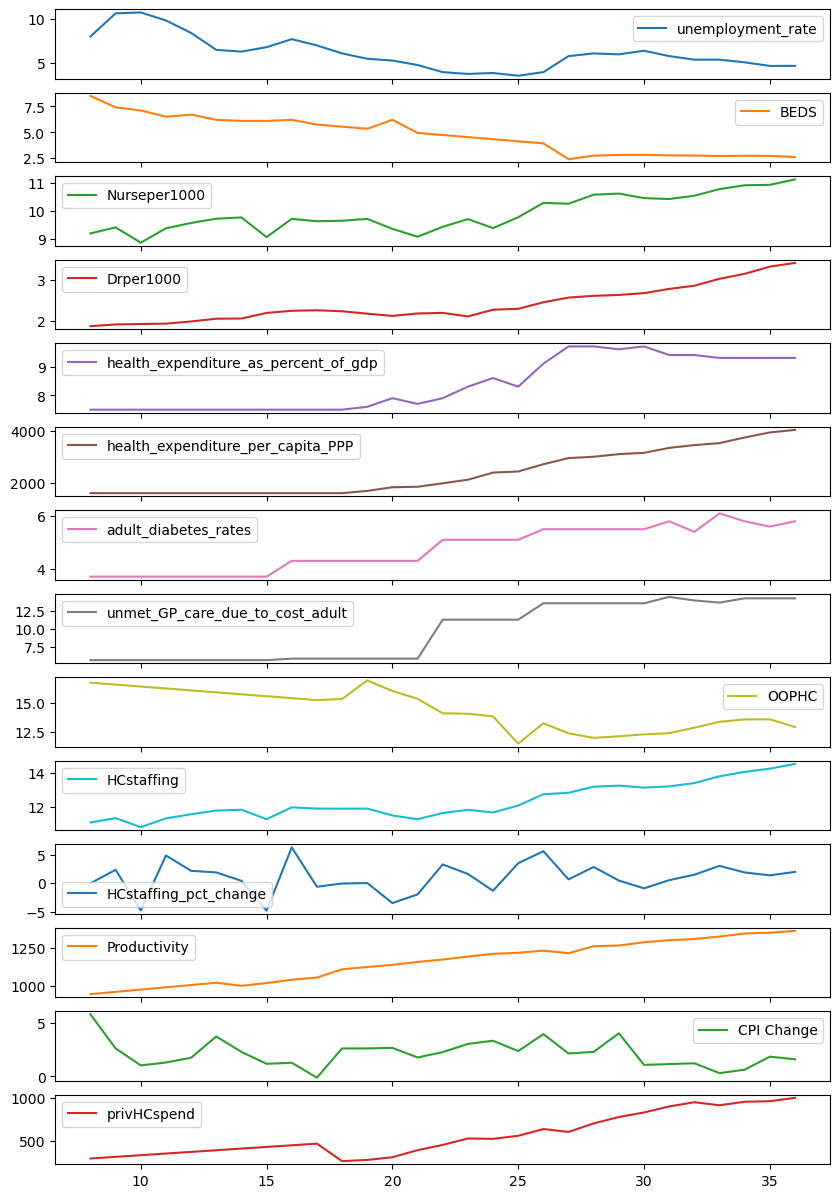

In [1371]:
data[['unemployment_rate', 'BEDS','Nurseper1000','Drper1000','health_expenditure_as_percent_of_gdp','health_expenditure_per_capita_PPP','adult_diabetes_rates','unmet_GP_care_due_to_cost_adult','OOPHC','HCstaffing','HCstaffing_pct_change','Productivity','CPI Change','privHCspend']].plot(subplots=True, figsize = (10,15))

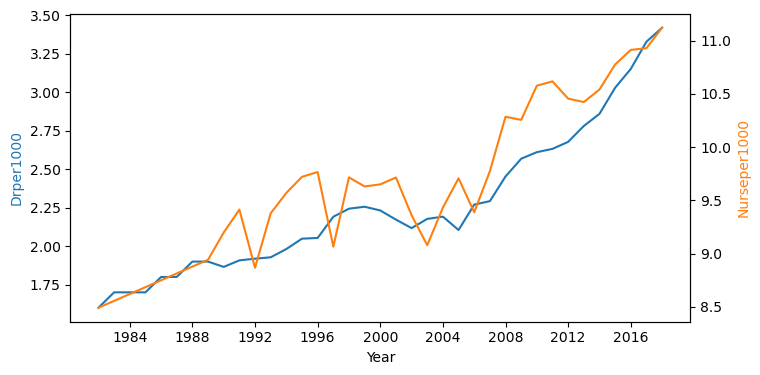

In [1342]:
# Create a figure and an axis
fig, ax1 = plt.subplots(figsize=(8, 4))

# Plot the 'Drper1000' column against the 'date' column
ax1.plot(WBmerged['Year'], WBmerged['Drper1000'], color='tab:blue')
ax1.set_xlabel('Year')
ax1.set_ylabel('Drper1000', color='tab:blue')

# Create a second y-axis that shares the same x-axis
ax2 = ax1.twinx()

# Plot the 'Nurseper1000' column against the 'date' column
ax2.plot(WBmerged['Year'], WBmerged['Nurseper1000'], color='tab:orange')
ax2.set_ylabel('Nurseper1000', color='tab:orange')

# Show the plot
plt.show()


##### As expected, healthcare staffing rates for Doctors and Nurses are increasing at a similar rate.

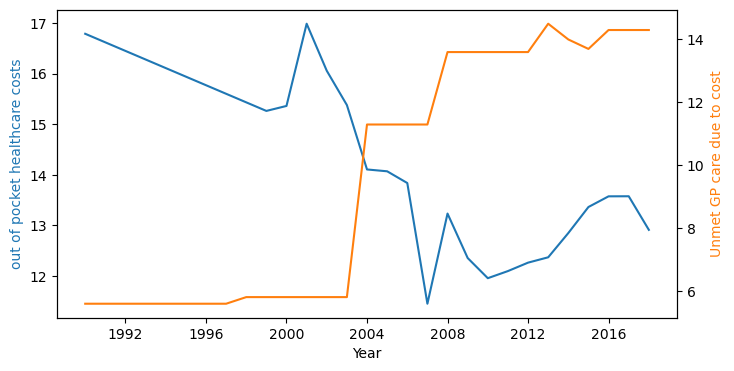

In [1374]:
import matplotlib.pyplot as plt

# Create a figure and an axis
fig, ax1 = plt.subplots(figsize=(8, 4))

# Plot the 'Drper1000' column against the 'date' column
ax1.plot(data['Year'], data['OOPHC'], color='tab:blue')
ax1.set_xlabel('Year')
ax1.set_ylabel('out of pocket healthcare costs', color='tab:blue')

# Create a second y-axis that shares the same x-axis
ax2 = ax1.twinx()

# Plot the 'Nurseper1000' column against the 'date' column
ax2.plot(data['Year'], data['unmet_GP_care_due_to_cost_adult'], color='tab:orange')
ax2.set_ylabel('Unmet GP care due to cost', color='tab:orange')

# Show the plot
plt.show()

There seems to be an inverse correlation between OOPHC and unmet GP care due to cost. 

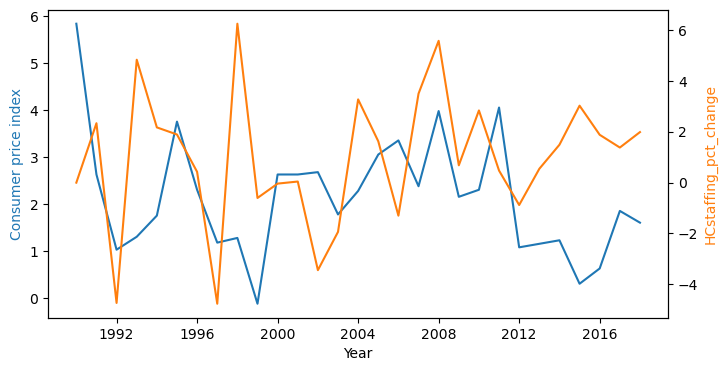

In [1344]:
import matplotlib.pyplot as plt

# Create a figure and an axis
fig, ax1 = plt.subplots(figsize=(8, 4))

# Plot the 'Drper1000' column against the 'date' column
ax1.plot(data['Year'], data['CPI Change'], color='tab:blue')
ax1.set_xlabel('Year')
ax1.set_ylabel('Consumer price index', color='tab:blue')

# Create a second y-axis that shares the same x-axis
ax2 = ax1.twinx()

# Plot the 'Nurseper1000' column against the 'date' column
ax2.plot(data['Year'], data['HCstaffing_pct_change'], color='tab:orange')
ax2.set_ylabel('HCstaffing_pct_change', color='tab:orange')

# Show the plot
plt.show()


##### There seems to be some correlation between CPI and HCstaffing_pct_change, however, this is not definitive, nor is this a predictive test or does it display correlation between these variables.

,adult_diabetes_rates,healthy_weight_adult,excellent_very_good_or_good_self_rated_health,depression_adult,veg_and_fruit_intake_adult,top_10_perc_wealth_share,top_5_perc_wealth_share,top_1_perc_wealth_share,health_expenditure_as_percent_of_gdp,health_expenditure_per_capita_PPP,psychological_distress_adult,GINI-BHC,unemployment_rate,P80:P20_bhc,unmet_GP_care_due_to_cost_adult,unhealthy_weight_adult,employment_rate,bottom_90_perc_wealth_share,Drper1000,Nurseper1000,privHCspend,OOPHC,CPI Change,Productivity,HCstaffing,HCstaffing_pct_change,BEDS
adult_diabetes_rates,1.000000,-0.882525,-0.399408,0.822497,-0.271097,0.680197,0.613923,0.418498,0.918337,0.911647,-0.196903,0.401109,-0.656811,0.276330,0.962557,0.882525,0.656811,-0.680197,0.850349,0.834613,0.874663,-0.883474,-0.181959,0.963282,0.858513,0.279279,-0.943735
healthy_weight_adult,-0.882525,1.000000,0.319914,-0.699731,0.233816,-0.577316,-0.520545,-0.347629,-0.795991,-0.788200,0.146242,-0.434930,0.813902,-0.389853,-0.847574,-1.000000,-0.813902,0.577316,-0.782440,-0.772125,-0.786717,0.837663,0.175302,-0.902228,-0.792472,-0.212162,0.911346
excellent_very_good_or_good_self_rated_health,-0.399408,0.319914,1.000000,-0.479951,0.550123,-0.349081,-0.326572,-0.268648,-0.332606,-0.503106,-0.394442,-0.170171,0.192617,0.270839,-0.358667,-0.319914,-0.192617,0.349081,-0.585374,-0.515032,-0.433590,0.219549,0.131975,-0.412887,-0.554990,-0.117709,0.348105
depression_adult,0.822497,-0.699731,-0.479951,1.000000,-0.433036,0.719848,0.650530,0.481486,0.900460,0.956683,-0.085932,0.438584,-0.329929,0.078742,0.860625,0.699731,0.329929,-0.719848,0.931835,0.928236,0.930215,-0.709908,-0.217254,0.835655,0.949037,0.214559,-0.839263
veg_and_fruit_intake_adult,-0.271097,0.233816,0.550123,-0.433036,1.000000,-0.542886,-0.558850,-0.579142,-0.138178,-0.484285,-0.757844,-0.315298,0.181694,-0.057563,-0.236689,-0.233816,-0.181694,0.542886,-0.617109,-0.429635,-0.481588,0.019552,0.339281,-0.377891,-0.516518,-0.079831,0.232459
top_10_perc_wealth_share,0.680197,-0.577316,-0.349081,0.719848,-0.542886,1.000000,0.992289,0.935984,0.658919,0.794836,0.036855,0.433673,-0.313973,0.211507,0.686246,0.577316,0.313973,-1.000000,0.775071,0.711460,0.840841,-0.519975,-0.253488,0.731747,0.752704,0.023576,-0.650458
top_5_perc_wealth_share,0.613923,-0.520545,-0.326572,0.650530,-0.558850,0.992289,1.000000,0.963507,0.572510,0.729652,0.081399,0.428493,-0.294644,0.223932,0.615031,0.520545,0.294644,-0.992289,0.720274,0.646904,0.785700,-0.446171,-0.243409,0.673654,0.690864,0.011832,-0.573990
top_1_perc_wealth_share,0.418498,-0.347629,-0.268648,0.481486,-0.579142,0.935984,0.963507,1.000000,0.365790,0.551806,0.176892,0.412266,-0.165363,0.244611,0.407212,0.347629,0.165363,-0.935984,0.577075,0.479482,0.624845,-0.218957,-0.257040,0.495672,0.530031,-0.088559,-0.381369
health_expenditure_as_percent_of_gdp,0.918337,-0.795991,-0.332606,0.900460,-0.138178,0.658919,0.572510,0.365790,1.000000,0.927602,-0.361644,0.314702,-0.465004,0.118649,0.953206,0.795991,0.465004,-0.658919,0.819506,0.855560,0.884949,-0.884775,-0.112617,0.891553,0.858363,0.178552,-0.926362
health_expenditure_per_capita_PPP,0.911647,-0.788200,-0.503106,0.956683,-0.484285,0.794836,0.729652,0.551806,0.927602,1.000000,-0.039545,0.402282,-0.478378,0.133170,0.930745,0.788200,0.478378,-0.794836,0.954282,0.915747,0.967822,-0.800808,-0.227994,0.929353,0.950814,0.200314,-0.903179


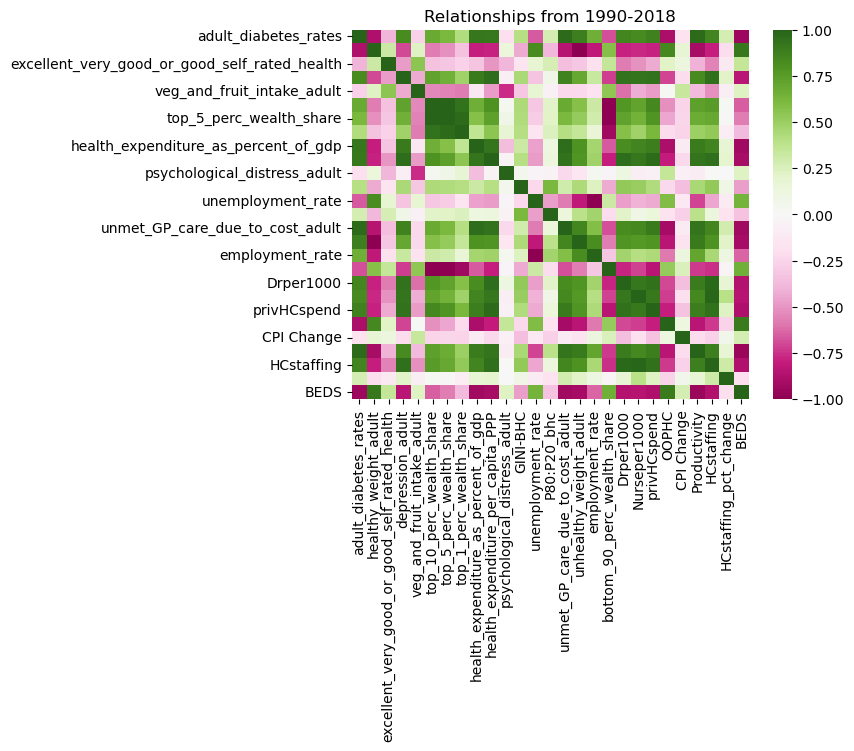

In [1345]:
#Creating a correlation matrix of the data to display correlations between all variables (1990-2018):
corr = data[['adult_diabetes_rates', 'healthy_weight_adult', 'excellent_very_good_or_good_self_rated_health', 'depression_adult', 'veg_and_fruit_intake_adult', 'top_10_perc_wealth_share', 'top_5_perc_wealth_share', 'top_1_perc_wealth_share', 'health_expenditure_as_percent_of_gdp', 'health_expenditure_per_capita_PPP', 'psychological_distress_adult', 'GINI-BHC', 'unemployment_rate', 'P80:P20_bhc', 'unmet_GP_care_due_to_cost_adult', 'unhealthy_weight_adult', 'employment_rate', 'bottom_90_perc_wealth_share', 'Year', 'Drper1000', 'Nurseper1000', 'privHCspend', 'OOPHC', 'CPI Change', 'Productivity', 'HCstaffing', 'HCstaffing_pct_change','BEDS']].corr()
#Plotting the correlations using the PiYG colourscheme, this colour scheme is great for showing off positive and negative correlations
sns.heatmap(corr, annot=False, cmap="PiYG").set(title = "Relationships from 1990-2018")

#Creating a dataframe to display the correlations in a table format. 
corr_df = pd.DataFrame(corr) 
#This table displays the correlations along with the associated colour scheme from the above matrix. 
corr_table = corr_df.style.background_gradient(cmap='PiYG') 
corr_table.set_caption("Relationships from 1990-2018")
corr_table

#### Correlation analysis:
There is a strong positive correlation between adult diabetes rates and unmet GP care due to cost (0.962557), indicating that as adult diabetes rates increase, so does the likelihood of unmet GP care due to cost. There is also a strong negative correlation between beds and adult diabetes rates (-0.943735), indicating that as the number of beds decreases, the adult diabetes rates increase. Notably, the best predictor of OOPHC is unmet GP care due to cost (-0.910266), as out of pocket healthcare costs decrease, unmet GP care due to cost increases. 

### Some particularly strong relationships are visualized below:

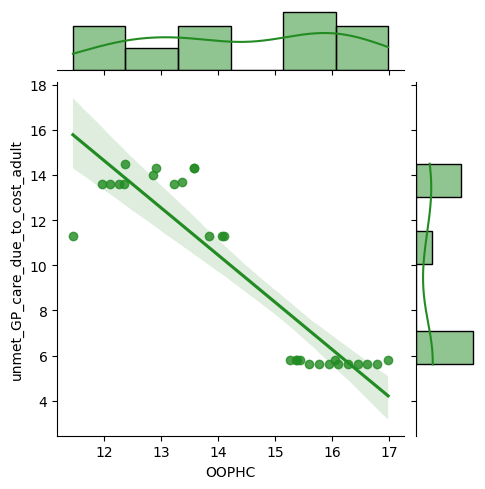

In [1346]:
sns.jointplot("OOPHC", "unmet_GP_care_due_to_cost_adult", data, kind='reg', height=5, color = 'forestgreen');

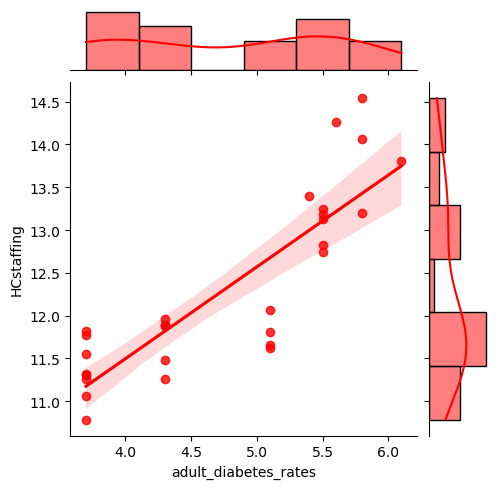

In [1347]:
sns.jointplot("adult_diabetes_rates", "HCstaffing", data, kind='reg', height=5, color = 'red');

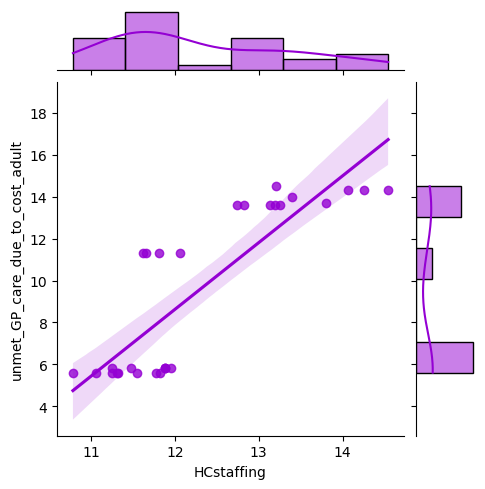

In [1348]:
sns.jointplot("HCstaffing", "unmet_GP_care_due_to_cost_adult", data, kind='reg', height=5, color = 'darkviolet');

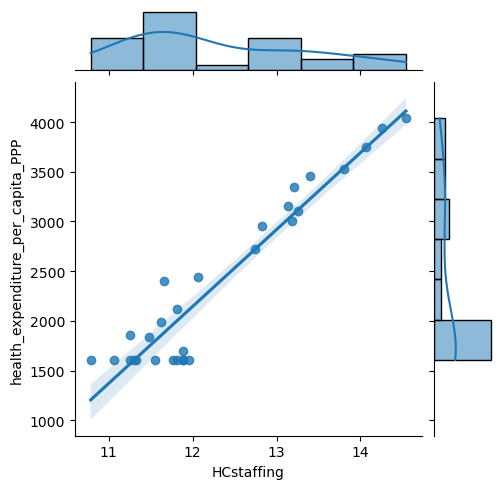

In [1349]:
sns.jointplot("HCstaffing", "health_expenditure_per_capita_PPP", data, kind='reg', height=5);

# Analysis 

 ### 1. How has the availability and affordability of healthcare services in New Zealand evolved over the years?

In previous investigations, it was evident that unmet_GP_care_due_to_cost_adult was a strong predictor of predictor of health outcomes such as adult diabetes rates and obesity. To expand upon that idea, this analyses will examine the relationship between variables related to healthcare access and other variables related to healthcare staffing and government investment. 

#### Variables related to healthcare access:
1. OOPHC
2. unmet_GP_care_due_to_cost_adult
3. PrivHCspend

#### Variables related to healthcare staffing:
1. Nurseper1000
2. Drper1000
3. HCstaffing_pct_change
4. HCstaffing

#### Variables related to government investment in healthcare:
1. health_expenditure_as_percent_of_gdp
2. health_expenditure_per_capita_PPP

##### Previous analyses:
For further context around previous investigations, please see my GitHub page: https://github.com/Walshammy/Intro-Data-Cleaning-158.739/blob/main/158739-JamesWalsham-Assignment1%20(1).ipynb

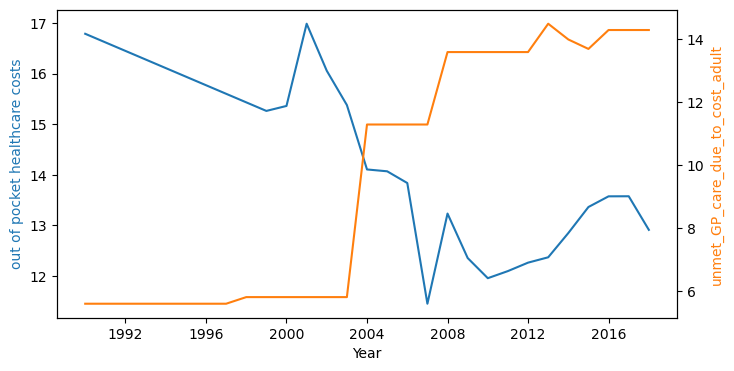

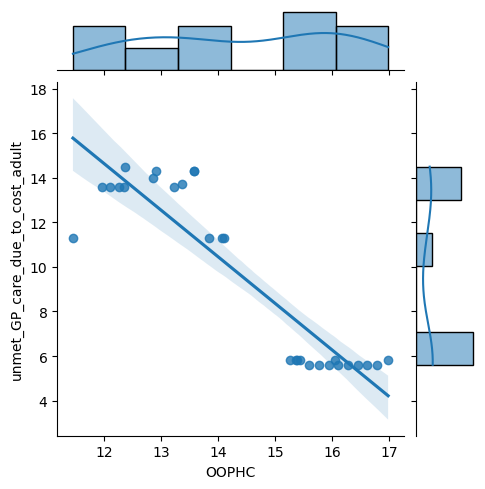

In [1350]:
# Create a figure and an axis
fig, ax1 = plt.subplots(figsize=(8, 4))
# Plot the 'Drper1000' column against the 'date' column
ax1.plot(data['Year'], data['OOPHC'], color='tab:blue')
ax1.set_xlabel('Year')
ax1.set_ylabel('out of pocket healthcare costs', color='tab:blue')
# Create a second y-axis that shares the same x-axis
ax2 = ax1.twinx()
# Plot the 'Nurseper1000' column against the 'date' column
ax2.plot(data['Year'], data['unmet_GP_care_due_to_cost_adult'], color='tab:orange')
ax2.set_ylabel('unmet_GP_care_due_to_cost_adult', color='tab:orange')
# Show the plot
plt.show()

sns.jointplot("OOPHC", "unmet_GP_care_due_to_cost_adult", data, kind='reg', height=5);


As demonstrated by the plots above, there is a strong negative relationship between out of pocket healthcare costs and unmet GP needs due to cost (r = 0.91). Out of pocket healthcare costs are effectively the percentage of healthcare costs put upon the individual that are not met by government, organizations or other agencies. Given the high correlation, between the amount of healthcare costs put upon the individual, it warrants investigation into which factors influence both of these outcomes. 

In [1351]:
#Creating a correlation matrix of the data to display correlations between all Vvriables related to healthcare access:
corr = data[['health_expenditure_as_percent_of_gdp', 'health_expenditure_per_capita_PPP','unmet_GP_care_due_to_cost_adult', 'Year', 'Drper1000', 'Nurseper1000', 'OOPHC','HCstaffing', 'HCstaffing_pct_change','privHCspend']].corr()
#Plotting the correlations using the PiYG colourscheme, this colour scheme is great for showing off positive and negative correlations

#Creating a dataframe to display the correlations in a table format. 
corr_df = pd.DataFrame(corr) 
#This table displays the correlations along with the associated colour scheme from the above matrix. 
corr_table = corr_df.style.background_gradient(cmap='PiYG') 
corr_table.set_caption("Relationships between variables related to healthcare access")
corr_table

,health_expenditure_as_percent_of_gdp,health_expenditure_per_capita_PPP,unmet_GP_care_due_to_cost_adult,Drper1000,Nurseper1000,OOPHC,HCstaffing,HCstaffing_pct_change,privHCspend
health_expenditure_as_percent_of_gdp,1.000000,0.927602,0.953206,0.819506,0.855560,-0.884775,0.858363,0.178552,0.884949
health_expenditure_per_capita_PPP,0.927602,1.000000,0.930745,0.954282,0.915747,-0.800808,0.950814,0.200314,0.967822
unmet_GP_care_due_to_cost_adult,0.953206,0.930745,1.000000,0.825437,0.837326,-0.910266,0.849797,0.286454,0.901216
Drper1000,0.819506,0.954282,0.825437,1.000000,0.916466,-0.696575,0.970258,0.178649,0.939709
Nurseper1000,0.855560,0.915747,0.837326,0.916466,1.000000,-0.726050,0.986065,0.392743,0.906322
OOPHC,-0.884775,-0.800808,-0.910266,-0.696575,-0.726050,1.000000,-0.728895,-0.261418,-0.793221
HCstaffing,0.858363,0.950814,0.849797,0.970258,0.986065,-0.728895,1.000000,0.311895,0.939053
HCstaffing_pct_change,0.178552,0.200314,0.286454,0.178649,0.392743,-0.261418,0.311895,1.000000,0.227513
privHCspend,0.884949,0.967822,0.901216,0.939709,0.906322,-0.793221,0.939053,0.227513,1.000000


### Regression modelling:
Both regression models have been created by selecting one variable from each of the above variable categories, models have been tested to balance both the highest R squared value, with the lowest P value for the independent variables. 

In [1352]:
# Create a time series model
model = sm.OLS(data['unmet_GP_care_due_to_cost_adult'], sm.add_constant(data[['health_expenditure_as_percent_of_gdp','HCstaffing_pct_change']]))

# Fit the model
results = model.fit()

# Print the regression results
print(results.summary())

                                   OLS Regression Results                                  
Dep. Variable:     unmet_GP_care_due_to_cost_adult   R-squared:                       0.923
Model:                                         OLS   Adj. R-squared:                  0.917
Method:                              Least Squares   F-statistic:                     154.9
Date:                             Thu, 01 Jun 2023   Prob (F-statistic):           3.60e-15
Time:                                     12:51:01   Log-Likelihood:                -43.190
No. Observations:                               29   AIC:                             92.38
Df Residuals:                                   26   BIC:                             96.48
Df Model:                                        2                                         
Covariance Type:                         nonrobust                                         
                                           coef    std err          t      P>|t|

#### Rationale:
In previous investigations, it was evident that unmet_GP_care_due_to_cost_adult was a strong predictor of predictor of health outcomes such as adult diabetes rates and obesity. To expand upon that idea, the above regression attempts to examine the relationship between unmet_GP_care_due_to_cost_adult and other variables related to healthcare staffing and government investment. To create a robust model, two variables have been selected, one each category; 1) health_expenditure_as_percent_of_gdp; 2) HCstaffing_pct_change.

#### Summary of the regression model:

The regression model demonstrates a strong explanatory power, as indicated by the R-squared value of 0.923, this model explains roughly 92.3% of the variation within unmet_gp_care_due_to_cost. Considering that both independent variables show statistically significant effects. Some statistical assumptions may have been violated, both the Jarque-Bera test and Omnibus test indicate a departure from normality, therefore the residuals are likely not normally distributed. Addititonally, the F-Statistic indicates that the overall model is statistically significant. 

##### Previous analyses:
For further context around previous investigations, please see my GitHub page: https://github.com/Walshammy/Intro-Data-Cleaning-158.739/blob/main/158739-JamesWalsham-Assignment1%20(1).ipynb

In [1353]:
# Create a time series model
model = sm.OLS(data['OOPHC'], sm.add_constant(data[['health_expenditure_as_percent_of_gdp','HCstaffing_pct_change']]))

# Fit the model
results = model.fit()

# Print the regression results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  OOPHC   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     50.07
Date:                Thu, 01 Jun 2023   Prob (F-statistic):           1.21e-09
Time:                        12:51:01   Log-Likelihood:                -33.283
No. Observations:                  29   AIC:                             72.57
Df Residuals:                      26   BIC:                             76.67
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


#### Rationale:
As outlined previously, Out of pocket healthcare costs (OOPHC) measure healthcare expenses by the individual, in comparison to government, organizations or companies. Given that OOPHC is highly related to unmet_GP_care_due_to_cost_adult, this analysis is using both these variables as the dependent variable. The above regression attempts to examine the relationship between OOPHC and other variables related to healthcare staffing and government investment. To create a robust model, two variables have been selected, one from each category; 1) health_expenditure_as_percent_of_gdp; 2) HCstaffing_pct_change.

#### Summary of the regression model:
The R squared value indicates that this model explains roughly 79.4% of the variation within the OOPHC. health_expenditure_as_percent_of_gdp does seem to be statistically significant, however, HCstaffing_pct_change does not show statistical significance (P = >0.05). Overall as with the previous model, the F statistic indicates that the model overall is statistically significant. Additionally, assumptions of autocorrelation and normality are both likely to be violated (Jarque-Bera, Durbin-Watson, omnibus test). 

### Theoretical context: 
#### 1. How has the availability and affordability of healthcare services in New Zealand evolved over the years?

Two variables have been examined, out of pocket HC costs (OOPHC) and unmet GP care due to cost (UnmetGP). Notably, these two variables indicate two separate trends. Firstly, OOPHC indicates that people are paying less for their medical care over time, OOPHC has decreased from 16.78% to 12.91% over the last 28 years. While contrarily, unmet GP care due to costs has increased from 5.61% of the NZ population indicating they have not seen their GP due to cost in the previous 12 months to 14.3%. Multiple factors could explain the difference, most notably, these are very different types of measurements. OOPHC measures concrete expenditure which could be explained by larger portion of the cost of healthcare being covered by government, private organizations (employers primarily) and public health organizations. 

Considering government health expenditure is statistically significant for both regression models but with opposite relationships (model 1 (UnmetGP) coefficient: 4.0511; model 3 (OOPHC) coefficient: -1.6394). This analysis indicates that government health expenditure correlates with a higher unmet GP need due to financial burden, yet shows a decrease in overall cost as measured by total healthcare costs (OOPHC). Notably, healthcare staffing seemed to have minor impact on either variable, HCstaffing, Nurseper1000, Drper1000 did not demonstrate statistically significant effects on either variable. However, HCstaffing_pct_change did show a statistically significant effect on UnmetGP. This is weak evidence to conclude whether or not healthcare staffing has an effect on health care access overall. 

###### Note: Given the violations of the assumptions of an OLS regression model in both cases, the evidence provided may not be considered statistically significant.

However, this analysis does clearly answer the research question (1), Although healthcare seems to have become more affordable, as measured by OOPHC, it does not seem to have become clearly more accessible. 

---------------------

## 2a. Are there any specific healthcare resources that are particularly sensitive to changes in government health spending?

#### Variables related to healthcare resources:
1. Nurseper1000
2. Drper1000
3. HCstaffing_pct_change
4. HCstaffing
5. BEDS

#### Variables related to government investment in healthcare:
1. health_expenditure_as_percent_of_gdp
2. health_expenditure_per_capita_PPP

In [1354]:
#Creating a correlation matrix of the data to display correlations between all Vvriables related to healthcare access:
corr = data[['health_expenditure_as_percent_of_gdp', 'health_expenditure_per_capita_PPP','BEDS', 'Year', 'Drper1000', 'Nurseper1000', 'HCstaffing', 'HCstaffing_pct_change']].corr()
#Plotting the correlations using the PiYG colourscheme, this colour scheme is great for showing off positive and negative correlations

#Creating a dataframe to display the correlations in a table format. 
corr_df = pd.DataFrame(corr) 
#This table displays the correlations along with the associated colour scheme from the above matrix. 
corr_table = corr_df.style.background_gradient(cmap='PiYG') 
corr_table.set_caption("Relationships between variables related to healthcare access")
corr_table

,health_expenditure_as_percent_of_gdp,health_expenditure_per_capita_PPP,BEDS,Drper1000,Nurseper1000,HCstaffing,HCstaffing_pct_change
health_expenditure_as_percent_of_gdp,1.000000,0.927602,-0.926362,0.819506,0.855560,0.858363,0.178552
health_expenditure_per_capita_PPP,0.927602,1.000000,-0.903179,0.954282,0.915747,0.950814,0.200314
BEDS,-0.926362,-0.903179,1.000000,-0.861175,-0.848069,-0.871155,-0.196073
Drper1000,0.819506,0.954282,-0.861175,1.000000,0.916466,0.970258,0.178649
Nurseper1000,0.855560,0.915747,-0.848069,0.916466,1.000000,0.986065,0.392743
HCstaffing,0.858363,0.950814,-0.871155,0.970258,0.986065,1.000000,0.311895
HCstaffing_pct_change,0.178552,0.200314,-0.196073,0.178649,0.392743,0.311895,1.000000


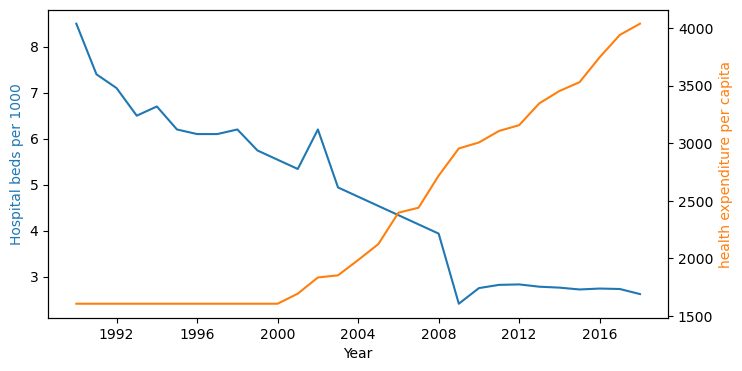

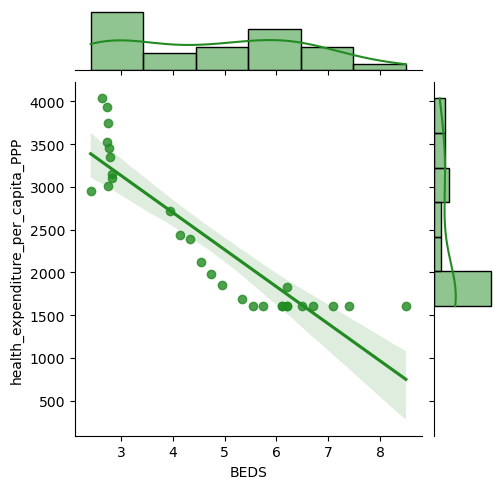

In [1355]:
# Create a figure and an axis
fig, ax1 = plt.subplots(figsize=(8, 4))
# Plot the 'Drper1000' column against the 'date' column
ax1.plot(data['Year'], data['BEDS'], color='tab:blue')
ax1.set_xlabel('Year')
ax1.set_ylabel('Hospital beds per 1000', color='tab:blue')
# Create a second y-axis that shares the same x-axis
ax2 = ax1.twinx()
# Plot the 'Nurseper1000' column against the 'date' column
ax2.plot(data['Year'], data['health_expenditure_per_capita_PPP'], color='tab:orange')
ax2.set_ylabel('health expenditure per capita', color='tab:orange')
# Show the plot
plt.show()

sns.jointplot("BEDS", "health_expenditure_per_capita_PPP", data, kind='reg', height=5, color = 'forestgreen');


#### Hospital resources vs Funding

When examining healthcare resources it is evident that there is an inverse correlation between hospital beds and government healthcare funding, it is very unlikely that hospital funding is causing a decrease in beds, but likely the case the lower hospitalization rates. When examining the data from the world bank, it seems more advanced economies have lower hospital bed numbers. For example, in Canada, there were 7 hospital beds per 1000 people in 1970 and only 2.5 beds per 1000 people in 2019. The regression modelling below looks at the relationships between healthcare resources (staffing numbers and beds) compared to government healthcare spending. 

In [1356]:
# Create a time series model
model = sm.OLS(data['health_expenditure_per_capita_PPP'], sm.add_constant(data[['Nurseper1000','Drper1000','BEDS','HCstaffing_pct_change']]))

# Fit the model
results = model.fit()

# Print the regression results
print(results.summary())

                                    OLS Regression Results                                   
Dep. Variable:     health_expenditure_per_capita_PPP   R-squared:                       0.940
Model:                                           OLS   Adj. R-squared:                  0.930
Method:                                Least Squares   F-statistic:                     94.43
Date:                               Thu, 01 Jun 2023   Prob (F-statistic):           2.54e-14
Time:                                       12:51:01   Log-Likelihood:                -195.43
No. Observations:                                 29   AIC:                             400.9
Df Residuals:                                     24   BIC:                             407.7
Df Model:                                          4                                         
Covariance Type:                           nonrobust                                         
                            coef    std err          t      

In [1357]:
# Create a time series model
model = sm.OLS(data['health_expenditure_as_percent_of_gdp'], sm.add_constant(data[['Nurseper1000','Drper1000','BEDS','HCstaffing_pct_change']]))

# Fit the model
results = model.fit()

# Print the regression results
print(results.summary())

                                     OLS Regression Results                                     
Dep. Variable:     health_expenditure_as_percent_of_gdp   R-squared:                       0.891
Model:                                              OLS   Adj. R-squared:                  0.873
Method:                                   Least Squares   F-statistic:                     49.30
Date:                                  Thu, 01 Jun 2023   Prob (F-statistic):           3.12e-11
Time:                                          12:51:01   Log-Likelihood:                -5.4612
No. Observations:                                    29   AIC:                             20.92
Df Residuals:                                        24   BIC:                             27.76
Df Model:                                             4                                         
Covariance Type:                              nonrobust                                         
                            co

In particular, hospital beds show a significant effect on the changes in government funding. With large coefficeints for both models (-131.85 and -0.3793), indicating that a decrease in hospital beds by 1 point per 1000 people, will coincide with a $131.85 million dollar increase in healthcare funding, or a 0.37% increase in healthcare funding as a proportion of total GDP (P = <0.05). Notably, hospital beds per 1000 people relies on a changing population, while hospital beds have decreased by roughly 69.18% decrease, population has increased by roughly 53.9%. This large increase in population size may explain the changes in hospital bed numbers relative to population. 

When government spending is measured as a percentage of total GDP, nurses per 1000 people shows a statistically significant effect, a 1 unit increase in nurses per 1000 indicates a 0.81% increase in government health spending (P = <0.05). But when government health spending is measured as a total number per capita, the number of doctors shows a significant effect (P = <0.05), a one unit increase in the number of doctors per 1000 people shows an increase of $1063.9 per capita on government health spending. 

###### Note: Based on the results, without further investigations the Jarque-Bera test and Omnibus test both show no violation of model assumptions, considering a significant F-value these results may be statistically significant. This analysis will move forward with the assumption that these models are valid. Further tests could be conducted to validate the assumptions.

To answer the research question, it seems that the results indicate that hospital beds, and staffing numbers are effected by government spending. However, it is likely the case that government spending is effected by these variables changing, rather than the other way around. Considering strong correlations between government spending (as measured by % of GDP and by total per capita) and healthcare resources, it seems there is a strong relationship between the two. Notably, previous investigations found a strong relationship between government health spending and metabolic diseases (https://github.com/Walshammy/Intro-Data-Cleaning-158.739/blob/main/158739-JamesWalsham-Assignment1%20(1).ipynb). Considering these relationships, it is likely the case that government health spending is a response to rising healthcare needs aswell as rising healthcare resources and costs. The anomaly in this theory is a decreasing number of hospital beds, this could be explained by a rising population, however, it could also be explained by increasing healthcare staffing or more sophisticated medical technology leading to decreased hospital stay times and lower hospital admission rates, this analysis has not directly examined this conclusion therefore it cannot be concluded that this is the case. In the case of diabetes patients, it seems improved primary care (general practitioner care) leads to lower hospital admission rates (Wolters et al., 2017). Considering this, a decrease in hospital beds may be explained by improved primary care aswell as increased population. 

#### 2b. Beds vs population analysis + total beds:

In [1358]:
#I have created an excel file using some data from the world bank population data, aswell as beds per 1000.
BedsVpop = pd.read_excel('C:/Users/james/Downloads/BEDSvPopulation.xlsx')

In [1359]:
#Converting the "Year" Column to datetime
BedsVpop['Year'] = pd.to_datetime(BedsVpop['Year'], format='%Y')
# Using beds per 1000 and population to calculate total beds
BedsVpop['Total Beds'] = (BedsVpop['BEDS'] * BedsVpop['NZpopulation']) / 1000
#sorting values to descending based on year
BedsVpop = BedsVpop.sort_values('Year', ascending=False)

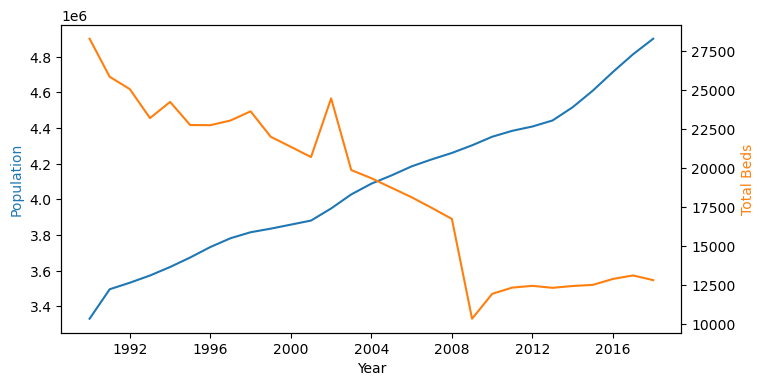

In [1360]:
# Create a figure and an axis
fig, ax1 = plt.subplots(figsize=(8, 4))
# Plot the 'Drper1000' column against the 'date' column
ax1.plot(data['Year'], BedsVpop['NZpopulation'], color='tab:blue')
ax1.set_xlabel('Year')
ax1.set_ylabel('Population', color='tab:blue')
# Create a second y-axis that shares the same x-axis
ax2 = ax1.twinx()
# Plot the 'Nurseper1000' column against the 'date' column
ax2.plot(BedsVpop['Year'], BedsVpop['Total Beds'], color='tab:orange')
ax2.set_ylabel('Total Beds', color='tab:orange')
# Show the plot
plt.show()

In line with previous conclusions, the total number of hospital beds has decreased by roughly 54.64%, considering the population has also increased by 47.17%. Therefore, changing population numbers do not account for the changes to hospital beds per 1000 as the population has increased, the total number of beds has decreased. There are likely other factors than government healthcare spending or population leading to changes in the total number of beds. 

----------------

In [1361]:
data.head(0)

,adult_diabetes_rates,healthy_weight_adult,excellent_very_good_or_good_self_rated_health,depression_adult,veg_and_fruit_intake_adult,top_10_perc_wealth_share,top_5_perc_wealth_share,top_1_perc_wealth_share,health_expenditure_as_percent_of_gdp,health_expenditure_per_capita_PPP,psychological_distress_adult,GINI-BHC,unemployment_rate,P80:P20_bhc,unmet_GP_care_due_to_cost_adult,unhealthy_weight_adult,employment_rate,bottom_90_perc_wealth_share,Year,Drper1000,Nurseper1000,privHCspend,OOPHC,BEDS,GDPchange,CPI Change,Productivity,HCstaffing,HCstaffing_pct_change


### 3. What is the relationship between New Zealand’s economic conditions and healthcare resources?

#### Variables related to economic conditions:
1. unemployment_rate
2. CPI Change
3. Productivity
4. GDPchange

#### Variables related to healthcare resources:
1. Nurseper1000
2. Drper1000
3. HCstaffing_pct_change
4. HCstaffing
5. BEDS

In previous analyses for question 2, it found that it seems there does seem to be a significant relationship between government health spending and healthcare resources, as would be expected. To answer the third research question, analyses will be carried out with the intent to answer the question of whether or not economic conditions have a signficiant effect on healthcare resources. As outlined above, variables have been categorized to be related to healthcare resources or to economic conditions. 

In [1362]:
#Creating a correlation matrix of the data to display correlations between all Vvriables related to healthcare access:
corr = data[['BEDS', 'HCstaffing','Year', 'HCstaffing_pct_change', 'Drper1000', 'Nurseper1000', 'GDPchange','Productivity','CPI Change','unemployment_rate']].corr()
#Plotting the correlations using the PiYG colourscheme, this colour scheme is great for showing off positive and negative correlations

#Creating a dataframe to display the correlations in a table format. 
corr_df = pd.DataFrame(corr) 
#This table displays the correlations along with the associated colour scheme from the above matrix. 
corr_table = corr_df.style.background_gradient(cmap='PiYG') 
corr_table.set_caption("Relationships between variables related to healthcare access and NZ's Economic conditions")
corr_table

,BEDS,HCstaffing,HCstaffing_pct_change,Drper1000,Nurseper1000,GDPchange,Productivity,CPI Change,unemployment_rate
BEDS,1.000000,-0.871155,-0.196073,-0.861175,-0.848069,-0.052788,-0.954584,0.276678,0.635580
HCstaffing,-0.871155,1.000000,0.311895,0.970258,0.986065,-0.020710,0.878794,-0.270242,-0.446192
HCstaffing_pct_change,-0.196073,0.311895,1.000000,0.178649,0.392743,-0.094057,0.175709,0.064272,-0.113062
Drper1000,-0.861175,0.970258,0.178649,1.000000,0.916466,0.003594,0.893886,-0.354655,-0.474485
Nurseper1000,-0.848069,0.986065,0.392743,0.916466,1.000000,-0.036699,0.838215,-0.202942,-0.411411
GDPchange,-0.052788,-0.020710,-0.094057,0.003594,-0.036699,1.000000,0.062325,-0.302042,-0.223683
Productivity,-0.954584,0.878794,0.175709,0.893886,0.838215,0.062325,1.000000,-0.212885,-0.708216
CPI Change,0.276678,-0.270242,0.064272,-0.354655,-0.202942,-0.302042,-0.212885,1.000000,-0.128589
unemployment_rate,0.635580,-0.446192,-0.113062,-0.474485,-0.411411,-0.223683,-0.708216,-0.128589,1.000000


Text(4, 1.05, 'Correlation: 0.87')

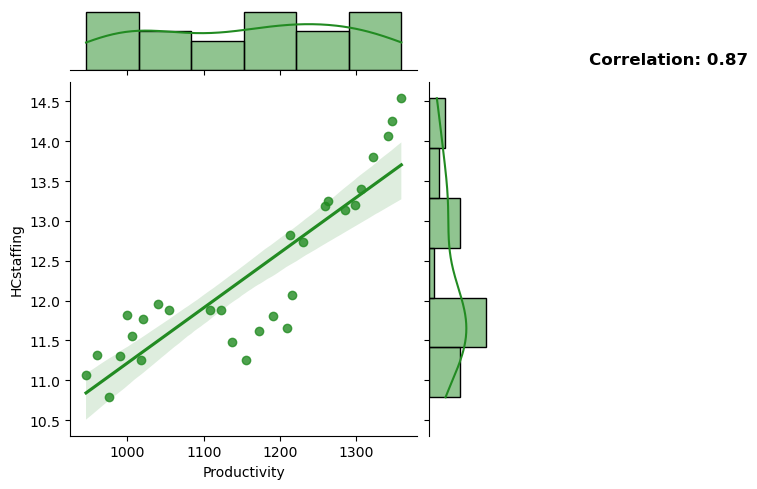

In [1363]:
sns.jointplot("Productivity", "HCstaffing", data, kind='reg', height=5, color = 'forestgreen');
text = 'Correlation: 0.87'
plt.text(4, 1.05, text, transform=plt.gca().transAxes, ha='center', fontsize=12, fontweight='bold', color='black')

### Model 1: predicting overall healthcare staffing 

In [1364]:
# Create a time series model
model = sm.OLS(data['HCstaffing'], sm.add_constant(data[['CPI Change','GDPchange','Productivity','unemployment_rate']]))

# Fit the model
results = model.fit()

# Print the regression results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             HCstaffing   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     30.34
Date:                Thu, 01 Jun 2023   Prob (F-statistic):           4.52e-09
Time:                        12:51:02   Log-Likelihood:                -15.812
No. Observations:                  29   AIC:                             41.62
Df Residuals:                      24   BIC:                             48.46
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.6858      1.80

### Model 2: predicting change in healthcare staffing 

In [1365]:
# Create a time series model
model = sm.OLS(data['HCstaffing_pct_change'], sm.add_constant(data[['CPI Change','GDPchange','Productivity','unemployment_rate']]))

# Fit the model
results = model.fit()

# Print the regression results
print(results.summary())

                              OLS Regression Results                             
Dep. Variable:     HCstaffing_pct_change   R-squared:                       0.049
Model:                               OLS   Adj. R-squared:                 -0.110
Method:                    Least Squares   F-statistic:                    0.3084
Date:                   Thu, 01 Jun 2023   Prob (F-statistic):              0.869
Time:                           12:51:02   Log-Likelihood:                -68.267
No. Observations:                     29   AIC:                             146.5
Df Residuals:                         24   BIC:                             153.4
Df Model:                              4                                         
Covariance Type:               nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const   

### Model 3: predicting change in hosptial beds 

In [1366]:
# Create a time series model
model = sm.OLS(data['BEDS'], sm.add_constant(data[['CPI Change','GDPchange','Productivity','unemployment_rate']]))

# Fit the model
results = model.fit()

# Print the regression results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   BEDS   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     67.29
Date:                Thu, 01 Jun 2023   Prob (F-statistic):           1.09e-12
Time:                        12:51:02   Log-Likelihood:                -20.986
No. Observations:                  29   AIC:                             51.97
Df Residuals:                      24   BIC:                             58.81
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                19.5570      2.16

### Summary of model results: 
For all of the models, the only variable which has a statistically significant effect on either the number of hospital beds, change in healthcare staffing numbers or on staffing numbers per 1000 people is productivity. Productivity is a reflect of how efficient an economy is relative to the inputs, a more productive economy produces more with less. Stats NZ outlines in the methods documentation for productivity that it excludes health care and social assistance in productivity measurements (at least for the 'measured sector' variable as taken from Stats NZ (Statistics New Zealand, 2014). Considering this, this analysis indicates that economic measures have minimal impact on changes in hospital staffing, or hospital beds. 

This makes sense, as healthcare needs should change based upon the economic situation of the country. Notably, the covid-19 pandemic (2020-2022) was not included in this analysis, this was a period of economic volatility coinciding with a healthcare emergency. To appropriately analyse and answer this question, it would be prudent to examine data relating specifically to healthcare spending, healthcare resources and economic conditions more broadly. Specifically, relating to economic conditions, measurements and markers of economic decline and acceleration would be beneficial. Additionally, a more in depth data-pool surrounding resources within the healthcare system would be prudent, such as expenditure of healthcare systems, annual capitation (registered patients) at general practices, along with the income from these registered patients. 

#### To answer the research question: What is the relationship between New Zealand’s economic conditions and healthcare resources? 
The data at present within this dataset are not sufficient to answer this question with adequate certainty. Considering the analysis of trends within healthcare resources are divergent, hospital beds are decreasing, while staffing numbers are increasing. Questions around what matters within the category of healthcare resources should first be answered, to appropriately pick target variables to perform analyses to examine the effect of external factors. 


-----------

## 4. Which variables have the largest impact on personal healthcare spending?

In [1367]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Select variables for analysis
X = data[['adult_diabetes_rates', 'HCstaffing','GDPchange', 'CPI Change']]

y = data['OOPHC']  # Target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create decision tree regressor
decision_tree = DecisionTreeRegressor(random_state=42)

# Fit the model on the training data
decision_tree.fit(X_train, y_train)

# Make predictions on the test set
y_pred = decision_tree.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

# Create a dataframe for the feature names and coefficients
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': decision_tree.feature_importances_})

# Print the feature importance
print("\nFeature Importance:")
print(coefficients)

# Create a summary table using statsmodels
X_train_sm = sm.add_constant(X_train)  # Add a constant term to the features
model_sm = sm.OLS(y_train, X_train_sm)  # Create the OLS model
results_sm = model_sm.fit()  # Fit the model
print("\nSummary Statistics:")
print(results_sm.summary())


Mean Squared Error (MSE): 0.4743720220541547
R-squared (R2): 0.8576431473032138

Feature Importance:
                Feature  Coefficient
0  adult_diabetes_rates     0.821334
1            HCstaffing     0.110757
2             GDPchange     0.063664
3            CPI Change     0.004246

Summary Statistics:
                            OLS Regression Results                            
Dep. Variable:                  OOPHC   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.718
Method:                 Least Squares   F-statistic:                     15.02
Date:                Thu, 01 Jun 2023   Prob (F-statistic):           1.46e-05
Time:                        12:51:02   Log-Likelihood:                -27.126
No. Observations:                  23   AIC:                             64.25
Df Residuals:                      18   BIC:                             69.93
Df Model:                           4                        

The goal of this model is to understand the variance within out of pocket healthcare costs (OOPHC), considering the relationship between unmet GP care due to cost and metabolic health conditions, understanding the factors that affect OOPHC is crucial. The above model was generated selecting all variables and then reducing variables down to just 4: 'adult_diabetes_rates', 'HCstaffing','GDPchange', 'CPI Change'. 

As evidenced by the R-squared value, this model explains roughly 76.9% of the variance of OOPHC. Notably, only adult_diabetes_rates show a statistically signficant effect (p = <0.05), by the estimations of this model a 1 unit increase in adult diabetes rates leads to a 2.08% decrease in out of pocket healthcare costs. This is interesting considering previous investigations found a very high correlation and relationship between adult diabetes rates and unmet need for GP care due to cost. Considering the similarly between these two variables (OOPHC and unmetGP), and the fact that they operate on underlying concept (healthcare pricing) these results are not suprising but they are concerning. It seems both investigations point towards the fact that the variables which predict adult diabetes rates the best tend to be related to pricing of healthcare services. 

previous investigations:https://github.com/Walshammy/Intro-Data-Cleaning-158.739/blob/main/158739-JamesWalsham-Assignment1%20(1).ipynb

# Conclusion 

The availability and affordability of healthcare services has changed over time with varying results. In terms of healthcare resources, stark differences are seen between healthcare staffing numbers (doctors and nurses) which see a steady increase and hospital beds which show the opposite. New Zealanders are paying less for healthcare as a percentage of the total cost of healthcare, yet, there are rising trends of New Zealanders being unable to access primary care services due to cost. As found in previous analyses, healthcare access seems to predict outcomes. Adult diabetes rates was the best predictor of personal healthcare costs for the population as a whole, as diabetes rates increase, personal healthcare costs decrease. The economic situation of New Zealand as measured by consumer price index changes, GDP changes and unemployment, does not seem to be a strong predictor of healthcare access or affordability, although industry producitivty does seem to predict healthcare resources. Further research is needed to understand the economic effect on healthcare access. To effectively evaluate and manage the problems facing healthcare patients and providers.


### Key findings:

1. Although New Zealanders are paying less of a proportion of the total cost of their healthcare, this trend does not coincide with greater access to healthcare, nor does it eliminate negative health outcomes from cost limiting healthcare access.
2. Hospital resources are complex, in New Zealand the number of hospital beds has decreased steadily, while the numbers of healthcare staff has increased consistently. This does not seem to have affected access to healthcare services. 
3. Out of pocket healthcare costs are best predicted by examining adult diabetes rates. similarly to unmet GP care due cost as found in the previous analyses. An increase in adult diabetes rates, is associated with a 2.08% decrease in out of pocket healthcare costs.
4. To fully analyse the effect that economic conditions and socioeconomic status have on health outcomes and health accessibility, further research and more comprehensive datasets are required to reach accurate conclusions. 

# Data Persistence
Continued in a following SQL-lite jupyter notebook (Assignemnt 3)

In [1423]:
#saving my entire dataframe to a CSV file, along with the 3 seperate dataframes:

data.to_csv('data.csv', index=False)
GSS.to_csv('GSS.csv', index=False)
STATSNZ.to_csv('STATSNZ.csv', index=False)
WBmerged.to_csv('WBmerged.csv', index=False)
BedsVpop.to_csv('bedsVpopulation.csv', index = False)

# Bibliography (optional) 

StatsNZ (2021). General Social Survey (GSS). General Social Survey (GSS) - Stats NZ DataInfo+. Retrieved April 8, 2023, from https://datainfoplus.stats.govt.nz/Item/nz.govt.stats/2ed50ad6-8ab8-47df-883d-210a51b50043 

StatsNZ (2014). Productivity statistics: Sources and methods (10th edition). Available from www.stats.govt.nz.

StatsNZ. (2019, June 19). Wellbeing statistics: 2018: Stats NZ. Wellbeing statistics: 2018 | Stats NZ. Retrieved April 8, 2023, from https://www.stats.govt.nz/information-releases/wellbeing-statistics-2018 

Susnjak, T., Schumacher, C., Ali, A., Brook, A., Geertsema, P., Matthewson, J., Owens, R., & Smith, J. (2019). Shared Prosperity Index. Knowledge Exchange Hub, Massey University. Auckland, New Zealand. https://doi.org/10.33217/KEH/SharedProsperity/001/05.2019

Wolters, R. J., Braspenning, J. C. C., & Wensing, M. (2017, 2017/07/01/). Impact of primary care on hospital admission rates for diabetes patients: A systematic review. Diabetes Research and Clinical Practice, 129, 182-196. https://doi.org/https://doi.org/10.1016/j.diabres.2017.05.001 